In [1]:
# import necessary packages

import pandas as pd # for working with tables
pd.options.mode.chained_assignment = None  # default = 'warn'

import os # for finding file directory with os.getcwd()
import datetime

# for calculations
import numpy as np 
import math

import matplotlib.pyplot as plt # for plotting

# for plotting histogram with percentages
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
from matplotlib.ticker import FormatStrFormatter

from PIL import Image # for converting plots to black-and-white
from IPython.display import HTML

from ipynb.fs.full.MyFunctions_00 import *

In [2]:
voids_bright = read_data_db('voids_bright_colors_new_' + '04-11-23') # timestamp())
walls_bright = read_data_db('walls_bright_colors_new_' + '04-11-23') # timestamp())

voids_main = read_data_db('voids_main_colors_new_' + '04-11-23') # timestamp())
walls_main = read_data_db('walls_main_colors_new_' + '04-11-23') # timestamp())

voids_dwarf = read_data_db('voids_dwarf_colors_new_' + '04-11-23') # timestamp())
walls_dwarf = read_data_db('walls_dwarf_colors_new_' + '04-11-23') # timestamp())

read voids_bright_colors_new_04-11-23
read walls_bright_colors_new_04-11-23
read voids_main_colors_new_04-11-23
read walls_main_colors_new_04-11-23
read voids_dwarf_colors_new_04-11-23
read walls_dwarf_colors_new_04-11-23


In [3]:
voids_bright.head()

,object_tag,num_obj,Pr,vflag,RA,DEC,PLATE,FIBERID,MJD,rabsmag_NSA,...,w2sigmpro,w2snr,w3mpro,w3sigmpro,w3snr,w4mpro,w4sigmpro,w4snr,W1-W2,W2-W3
0,75.0,24.0,0.933297,1,145.874464,-0.608775,266,138,51630,-20.979137,...,0.057,19.1,10.802,0.124,8.7,8.286,0.435,2.5,0.110,3.232
1,95.0,24.0,0.948802,1,146.222266,-0.375920,266,168,51630,-20.544321,...,0.029,37.9,9.610,0.044,24.9,8.194,0.273,4.0,0.163,3.465
2,121.0,23.0,0.987329,1,145.681110,-0.867233,266,207,51630,-21.178394,...,0.027,39.9,11.039,0.139,7.8,8.913,NaN,-0.5,0.034,1.967
3,127.0,22.0,0.998411,1,145.759730,-0.813891,266,216,51630,-20.736423,...,0.058,18.7,10.507,0.120,9.1,7.438,NaN,1.4,0.127,2.721
4,196.0,23.0,0.630624,1,145.296063,0.801639,266,339,51630,-20.109673,...,0.035,30.7,11.651,NaN,1.8,8.791,NaN,0.4,0.109,2.199


In [4]:
voids_bright = drop_na_W3(voids_bright)
walls_bright = drop_na_W3(walls_bright)
print('')
voids_main = drop_na_W3(voids_main)
walls_main = drop_na_W3(walls_main)
print('')
voids_dwarf = drop_na_W3(voids_dwarf)
walls_dwarf = drop_na_W3(walls_dwarf)

30898
30897

119212
119210


39646
39645

99504
99504


717
717

539
539



In [5]:
voids_bright = drop_r85(voids_bright)
walls_bright = drop_r85(walls_bright)
print('')
voids_main = drop_r85(voids_main)
walls_main = drop_r85(walls_main)
print('')
voids_dwarf = drop_r85(voids_dwarf)
walls_dwarf = drop_r85(walls_dwarf)

30897
3160

119210
11897


39645
2472

99504
5791


717
38

539
17



### Create Color-color Diagram

In [6]:
mean_voids_b_12 = voids_bright['W1-W2'].mean()
std_voids_b_12 = np.std(voids_bright['W1-W2'])

mean_voids_b_23 = voids_bright['W2-W3'].mean()
std_voids_b_23 = np.std(voids_bright['W2-W3'])

mean_walls_b_12 = walls_bright['W1-W2'].mean()
std_walls_b_12 = np.std(walls_bright['W1-W2'])

mean_walls_b_23 = walls_bright['W2-W3'].mean()
std_walls_b_23 = np.std(walls_bright['W2-W3'])

In [7]:
mean_voids_m_12 = voids_main['W1-W2'].mean()
std_voids_m_12 = np.std(voids_main['W1-W2'])

mean_voids_m_23 = voids_main['W2-W3'].mean()
std_voids_m_23 = np.std(voids_main['W2-W3'])

mean_walls_m_12 = walls_main['W1-W2'].mean()
std_walls_m_12 = np.std(walls_main['W1-W2'])

mean_walls_m_23 = walls_main['W2-W3'].mean()
std_walls_m_23 = np.std(walls_main['W2-W3'])

In [8]:
mean_voids_d_12 = voids_dwarf['W1-W2'].mean()
std_voids_d_12 = np.std(voids_dwarf['W1-W2'])

mean_voids_d_23 = voids_dwarf['W2-W3'].mean()
std_voids_d_23 = np.std(voids_dwarf['W2-W3'])

mean_walls_d_12 = walls_dwarf['W1-W2'].mean()
std_walls_d_12 = np.std(walls_dwarf['W1-W2'])

mean_walls_d_23 = walls_dwarf['W2-W3'].mean()
std_walls_d_23 = np.std(walls_dwarf['W2-W3'])

In [9]:
walls_dwarf.head()

,object_tag,num_obj,Pr,vflag,RA,DEC,PLATE,FIBERID,MJD,rabsmag_NSA,...,w2sigmpro,w2snr,w3mpro,w3sigmpro,w3snr,w4mpro,w4sigmpro,w4snr,W1-W2,W2-W3
2,66792.0,19.0,0.853755,0,173.212279,1.602669,513,261,51989,-16.778788,...,0.052,21.0,10.556,0.083,13.0,8.212,NaN,2.0,0.225,3.745
3,66886.0,23.0,0.854269,0,174.640871,2.873781,513,586,51989,-13.152692,...,0.048,22.7,12.309,0.490,2.2,8.382,NaN,1.0,0.118,1.873
6,88484.0,26.0,0.904755,0,227.058047,3.513564,589,26,52055,-13.860901,...,0.040,27.3,11.996,0.257,4.2,9.073,NaN,0.6,0.232,1.883
87,317808.0,4.0,0.959168,0,137.721287,31.429355,1591,94,52976,-16.826427,...,0.102,10.7,11.940,0.334,3.2,8.205,NaN,1.6,0.156,3.279
104,338639.0,4.0,0.938688,0,204.674841,50.563255,1669,273,53433,-16.478563,...,0.067,16.3,12.521,NaN,0.7,8.874,NaN,1.1,0.136,2.656


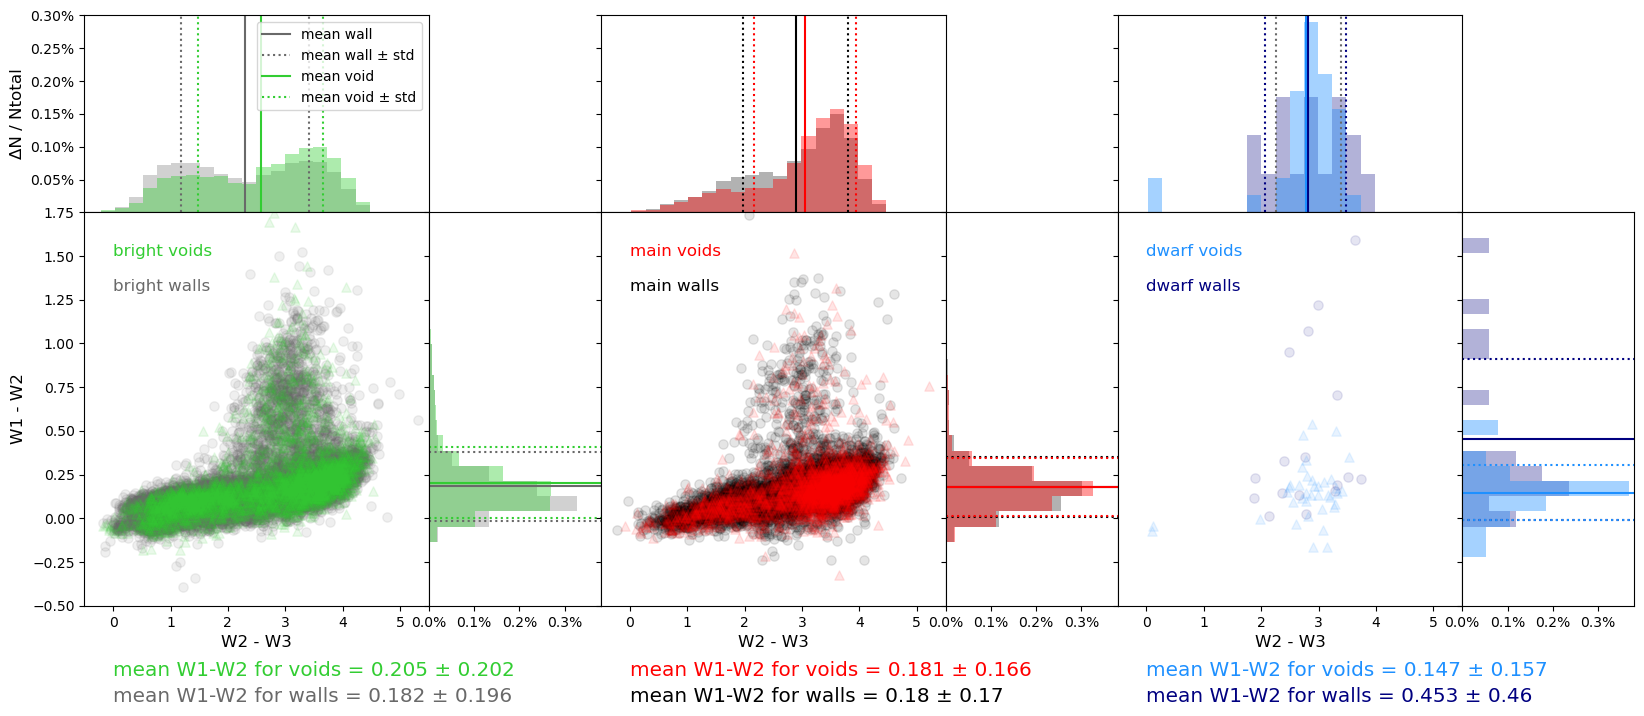

In [33]:
# plot color-color diagram!

num_bins = 20
num_bins_h = 30

# create a square image with four subplots (we will delete the top-right column later on)
fig, axs = plt.subplots(2, 6, 
                        sharex = 'col', 
                        sharey = 'row',
                        figsize = (20, 20.0/3.0 + 1), 
                        gridspec_kw = {'height_ratios': [1, 2],
                                     'width_ratios': [2, 1, 2, 1, 2, 1]} 
                       )

plt.subplots_adjust(wspace = 0, hspace = 0)

# fig.suptitle('Color–color diagram showing variable (r > 0. 85) void and wall galaxies', fontsize = 'x-large')

# BRIGHT

# axs[0, 0].set_title('Bright variable galaxies', fontsize = 'large')

# in the bottom left subplot, make a color-color diagram by plotting each galaxy by its two colors
# wall galaxies are in gray, while void galaxies are in blue
# use a low alpha value to avoid overplotting - there are a lot of overlapping points
axs[1, 0].scatter(walls_bright['W2-W3'], 
                  walls_bright['W1-W2'], 
                  s = 45, 
                  c = 'dimgray',
                  marker = 'o', 
                  label = 'walls',
                  alpha = 0.1)

axs[1, 0].scatter(voids_bright['W2-W3'], 
                  voids_bright['W1-W2'], 
                  s = 45,
                  c = 'limegreen',
                  marker = '^', # change symbol
                  label = 'void',
                  alpha = 0.1)

# axs[0, 0].set_ylim([0, 0.1])
# axs[0, 2].set_ylim([0, 0.1])
# axs[0, 4].set_ylim([0, 0.3])

# set the axes of the top left and bottom right subplots to be percentages
axs[0, 0].yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 2))
axs[1, 1].xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))

# only label the outer axes of the grouped subplots
for ax in axs.flat:
    ax.label_outer()

    
# make a histogram in the top left subplot that corresponds with the color on the x-axis of the diagram
# manually increase the number of bins to more clearly see the distribution
axs[0, 0].hist(walls_bright['W2-W3'], 
               color = 'dimgray',
               weights = np.ones_like(walls_bright['W2-W3']) / len(walls_bright['W2-W3']),
               alpha = 0.3,
              bins = np.linspace(walls_main['W2-W3'].min(), 
                                  walls_main['W2-W3'].max(), 
                                  num = num_bins, 
                                  endpoint = False))

axs[0, 0].hist(voids_bright['W2-W3'],
               color = 'limegreen',
               linewidth = 1.2,
               weights = np.ones_like(voids_bright['W2-W3']) / len(voids_bright['W2-W3']),
               alpha = 0.4,
               bins = np.linspace(walls_main['W2-W3'].min(), 
                                  walls_main['W2-W3'].max(), 
                                  num = num_bins, 
                                  endpoint = False))

# plot lines for the mean ± the standard deviation of the mean for both galaxy groups for each color
axs[0, 0].axvline(x = mean_walls_b_23, color = 'dimgrey', label = 'mean wall')
axs[0, 0].axvline(x = mean_walls_b_23 - std_walls_b_23, linestyle = 'dotted', color = 'dimgrey', label = 'mean wall ± std')
axs[0, 0].axvline(x = mean_walls_b_23 + std_walls_b_23, linestyle = 'dotted', color = 'dimgrey')

axs[0, 0].axvline(x = mean_voids_b_23, color = 'limegreen', label = 'mean void')
axs[0, 0].axvline(x = mean_voids_b_23 - std_voids_b_23, linestyle = 'dotted', color = 'limegreen', label = 'mean void ± std')
axs[0, 0].axvline(x = mean_voids_b_23 + std_voids_b_23, linestyle = 'dotted', color = 'limegreen')

# do the same for the bottom right subplot, except the histogram is horizontal
axs[1, 1].hist(walls_bright['W1-W2'],
               color = 'dimgray', 
               orientation='horizontal',
               weights = np.ones_like(walls_bright['W1-W2']) / len(walls_bright['W1-W2']),
               alpha = 0.3,
               bins = np.linspace(walls_main['W1-W2'].min(), 
                                  walls_main['W1-W2'].max(), 
                                  num = num_bins_h, 
                                  endpoint = False)
              )

axs[1, 1].hist(voids_bright['W1-W2'], 
               color = 'limegreen', 
               weights = np.ones_like(voids_bright['W1-W2']) / len(voids_bright['W1-W2']),
               alpha = 0.4,
               orientation='horizontal',
               bins = np.linspace(walls_main['W1-W2'].min(), 
                                  walls_main['W1-W2'].max(), 
                                  num = num_bins_h, 
                                  endpoint = False)
               )

axs[1, 1].axhline(y = mean_walls_b_12, color = 'dimgrey', label = 'mean wall')
axs[1, 1].axhline(y = mean_walls_b_12 - std_walls_b_12, linestyle = 'dotted', color = 'dimgrey', 
                  label = 'mean wall ± std')
axs[1, 1].axhline(y = mean_walls_b_12 + std_walls_b_12, linestyle = 'dotted', color = 'dimgrey')

axs[1, 1].axhline(y = mean_voids_b_12, color = 'limegreen', label = 'mean void')
axs[1, 1].axhline(y = mean_voids_b_12 - std_voids_b_12, linestyle = 'dotted', color = 'limegreen', 
                  label = 'mean voids ± std')
axs[1, 1].axhline(y = mean_voids_b_12 + std_voids_b_12, linestyle = 'dotted', color = 'limegreen')

# remove the unnecessary top right subplot
axs[0, 1].set_axis_off()

axs[1, 0].set_xlabel('W2 - W3', fontsize = 'large')
axs[1, 0].set_ylabel('W1 - W2', fontsize = 'large')

axs[0, 0].set_ylabel('ΔN / Ntotal', fontsize = 'large')

# set the ranges for the line segments that make up the wedge in which AGNs form, according to Mateos et al.
xp1 = np.linspace(1.958, 6.9, 100)
xp2 = np.linspace(2.25, 6.9, 100) # ~ 2.157 (Mateos et al.)
xp3 = np.linspace(1.958, 2.25, 100)

# calculate the y values for each line segment and plot
yp1 = (0.315 * xp1) + 0.796
yp2 = (0.315 * xp2) - 0.222
yp3 = (-3.172 * xp3) + 7.624

axs[0, 0].legend(loc = 'best')
# axs[1, 1].legend(loc = 'upper right')

# MAIN

# axs[0, 2].set_title('Main variable Galaxies', fontsize = 'large')

axs[1, 2].scatter(walls_main['W2-W3'], 
                  walls_main['W1-W2'], 
                  s = 45, 
                  c = 'black',
                  marker = 'o', 
                  label = 'walls',
                  alpha = 0.1)

axs[1, 2].scatter(voids_main['W2-W3'], 
                  voids_main['W1-W2'], 
                  s = 45,
                  c = 'red',
                  marker = '^', # change symbol
                  label = 'void',
                  alpha = 0.1)

# set the axes of the top left and bottom right subplots to be percentages
# axs[0, 2].yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))
axs[1, 3].xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))

# only label the outer axes of the grouped subplots
for ax in axs.flat:
    ax.label_outer()

# make a histogram in the top left subplot that corresponds with the color on the x-axis of the diagram
# manually increase the number of bins to more clearly see the distribution
axs[0, 2].hist(walls_main['W2-W3'], 
               color = 'black',
               weights = np.ones_like(walls_main['W2-W3']) / len(walls_main['W2-W3']),
               alpha = 0.3,
               bins = np.linspace(walls_main['W2-W3'].min(), 
                                  walls_main['W2-W3'].max(), 
                                  num = num_bins, 
                                  endpoint = False))

axs[0, 2].hist(voids_main['W2-W3'],
               color = 'red',
               linewidth = 1.2,
               weights = np.ones_like(voids_main['W2-W3']) / len(voids_main['W2-W3']),
               alpha = 0.4,
               bins = np.linspace(walls_main['W2-W3'].min(), 
                                  walls_main['W2-W3'].max(), 
                                  num = num_bins, 
                                  endpoint = False))

# plot lines for the mean ± the standard deviation of the mean for both galaxy groups for each color
axs[0, 2].axvline(x = mean_walls_m_23, color = 'black')
axs[0, 2].axvline(x = mean_walls_m_23 - std_walls_m_23, linestyle = 'dotted', color = 'black')
axs[0, 2].axvline(x = mean_walls_m_23 + std_walls_m_23, linestyle = 'dotted', color = 'black')

axs[0, 2].axvline(x = mean_voids_m_23, color = 'red')
axs[0, 2].axvline(x = mean_voids_m_23 - std_voids_m_23, linestyle = 'dotted', color = 'red')
axs[0, 2].axvline(x = mean_voids_m_23 + std_voids_m_23, linestyle = 'dotted', color = 'red')

# do the same for the bottom right subplot, except the histogram is horizontal
axs[1, 3].hist(walls_main['W1-W2'],
               color = 'black', 
               orientation='horizontal',
               weights = np.ones_like(walls_main['W1-W2']) / len(walls_main['W1-W2']),
               alpha = 0.3,
               bins = np.linspace(walls_main['W1-W2'].min(), 
                                  walls_main['W1-W2'].max(), 
                                  num = num_bins_h, 
                                  endpoint = False)
              )

axs[1, 3].hist(voids_main['W1-W2'], 
               color = 'red', 
               weights = np.ones_like(voids_main['W1-W2']) / len(voids_main['W1-W2']),
               alpha = 0.4,
               orientation='horizontal',
               bins = np.linspace(walls_main['W1-W2'].min(), 
                                  walls_main['W1-W2'].max(), 
                                  num = num_bins_h, 
                                  endpoint = False)
               )

axs[1, 3].axhline(y = mean_walls_m_12, color = 'black', label = 'mean wall')
axs[1, 3].axhline(y = mean_walls_m_12 - std_walls_m_12, linestyle = 'dotted', color = 'black', 
                  label = 'mean wall ± std')
axs[1, 3].axhline(y = mean_walls_m_12 + std_walls_m_12, linestyle = 'dotted', color = 'black')

axs[1, 3].axhline(y = mean_voids_m_12, color = 'red', label = 'mean void')
axs[1, 3].axhline(y = mean_voids_m_12 - std_voids_m_12, linestyle = 'dotted', color = 'red', 
                  label = 'mean voids ± std')
axs[1, 3].axhline(y = mean_voids_m_12 + std_voids_m_12, linestyle = 'dotted', color = 'red')

# remove the unnecessary top right subplot
axs[0, 1].set_axis_off()

axs[1, 2].set_xlabel('W2 - W3', fontsize = 'large')

axs[0, 2].set_ylabel('ΔN / Ntotal', fontsize = 'large')

# DWARF

# axs[0, 4].set_title('Dwarf variable galaxies', fontsize = 'large')

axs[1, 4].scatter(walls_dwarf['W2-W3'], 
                  walls_dwarf['W1-W2'], 
                  s = 45, 
                  c = 'navy',
                  marker = 'o', 
                  label = 'walls',
                  alpha = 0.1)

axs[1, 4].scatter(voids_dwarf['W2-W3'], 
                  voids_dwarf['W1-W2'], 
                  s = 45,
                  c = 'dodgerblue',
                  marker = '^', # change symbol
                  label = 'void',
                  alpha = 0.1)

# set the axes of the top left and bottom right subplots to be percentages
# axs[0, 4].yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))
axs[1, 5].xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))

# only label the outer axes of the grouped subplots
for ax in axs.flat:
    ax.label_outer()

# make a histogram in the top left subplot that corresponds with the color on the x-axis of the diagram
# manually increase the number of bins to more clearly see the distribution
axs[0, 4].hist(walls_dwarf['W2-W3'], 
               color = 'navy',
               weights = np.ones_like(walls_dwarf['W2-W3']) / len(walls_dwarf['W2-W3']),
               alpha = 0.3,
                bins = np.linspace(walls_main['W2-W3'].min(), 
                                  walls_main['W2-W3'].max(), 
                                  num = num_bins, 
                                  endpoint = False))

axs[0, 4].hist(voids_dwarf['W2-W3'],
               color = 'dodgerblue',
               linewidth = 1.2,
               weights = np.ones_like(voids_dwarf['W2-W3']) / len(voids_dwarf['W2-W3']),
               alpha = 0.4,
#                bins = np.linspace(voids_dwarf['W2-W3'].min(), 
#                                   voids_dwarf['W2-W3'].max(), 
#                                   num = num_bins, 
#                                   endpoint = False)
                bins = np.linspace(walls_main['W2-W3'].min(), 
                                  walls_main['W2-W3'].max(), 
                                  num = num_bins, 
                                  endpoint = False))

# plot lines for the mean ± the standard deviation of the mean for both galaxy groups for each color
axs[0, 4].axvline(x = mean_walls_d_23, color = 'navy')
axs[0, 4].axvline(x = mean_walls_d_23 - std_walls_d_23, linestyle = 'dotted', color = 'dimgrey')
axs[0, 4].axvline(x = mean_walls_d_23 + std_walls_d_23, linestyle = 'dotted', color = 'dimgrey')

axs[0, 4].axvline(x = mean_voids_d_23, color = 'dodgerblue')
axs[0, 4].axvline(x = mean_voids_d_23 - std_voids_d_23, linestyle = 'dotted', color = 'navy')
axs[0, 4].axvline(x = mean_voids_d_23 + std_voids_d_23, linestyle = 'dotted', color = 'navy')

# do the same for the bottom right subplot, except the histogram is horizontal
axs[1, 5].hist(walls_dwarf['W1-W2'],
               color = 'navy', 
               orientation='horizontal',
               weights = np.ones_like(walls_dwarf['W1-W2']) / len(walls_dwarf['W1-W2']),
               alpha = 0.3,
               bins = np.linspace(walls_main['W1-W2'].min(), 
                                  walls_main['W1-W2'].max(), 
                                  num = num_bins_h, 
                                  endpoint = False)
              )

axs[1, 5].hist(voids_dwarf['W1-W2'], 
               color = 'dodgerblue', 
               weights = np.ones_like(voids_dwarf['W1-W2']) / len(voids_dwarf['W1-W2']),
               alpha = 0.4,
               orientation='horizontal',
#                bins = np.linspace(voids_dwarf['W1-W2'].min(), 
#                                   voids_dwarf['W1-W2'].max(), 
#                                   num = num_bins,
#                                   endpoint = False)
              bins = np.linspace(walls_main['W1-W2'].min(), 
                                  walls_main['W1-W2'].max(), 
                                  num = num_bins_h, 
                                  endpoint = False)
               )

axs[1, 5].axhline(y = mean_walls_d_12, color = 'navy', label = 'mean wall')
axs[1, 5].axhline(y = mean_walls_d_12 - std_walls_d_12, linestyle = 'dotted', color = 'navy', 
                  label = 'mean wall ± std')
axs[1, 5].axhline(y = mean_walls_d_12 + std_walls_d_12, linestyle = 'dotted', color = 'navy')

axs[1, 5].axhline(y = mean_voids_d_12, color = 'dodgerblue', label = 'mean void')
axs[1, 5].axhline(y = mean_voids_d_12 - std_voids_d_12, linestyle = 'dotted', color = 'dodgerblue', 
                  label = 'mean voids ± std')
axs[1, 5].axhline(y = mean_voids_d_12 + std_voids_d_12, linestyle = 'dotted', color = 'dodgerblue')

# remove the unnecessary top right subplot
axs[0, 1].set_axis_off()
axs[0, 3].set_axis_off()
axs[0, 5].set_axis_off()

axs[1, 4].set_xlabel('W2 - W3', fontsize = 'large')

axs[1, 0].set_ylim([-0.5, 1.75])

axs[1, 0].set_xlim([-0.5, 5.5])
axs[1, 2].set_xlim([-0.5, 5.5])
axs[1, 4].set_xlim([-0.5, 5.5])

axs[0, 0].set_ylim(0.0001, 0.3)

axs[1, 1].set_xlim([0, 0.38])
axs[1, 3].set_xlim([0, 0.38])
axs[1, 5].set_xlim([0, 0.38])

axs[1, 0].text(0.0, 1.50, 'bright voids', ha = 'left', c = 'limegreen', size = 'large')
axs[1, 0].text(0.0, 1.30, 'bright walls', ha = 'left', c = 'dimgrey', size = 'large')

axs[1, 2].text(0.0, 1.50, 'main voids', ha = 'left', c = 'red', size = 'large')
axs[1, 2].text(0.0, 1.30, 'main walls', ha = 'left', c = 'black', size = 'large')

axs[1, 4].text(0.0, 1.50, 'dwarf voids', ha = 'left', c = 'dodgerblue', size = 'large')
axs[1, 4].text(0.0, 1.30, 'dwarf walls', ha = 'left', c = 'navy', size = 'large')

# --------------------

axs[1, 0].text(0.0, -0.9, 'mean W1-W2 for voids = ' + str(round(mean_voids_b_12, 3)) + ' ± ' +  str(round(std_voids_b_12, 3)), ha = 'left', c = 'limegreen', size = 'x-large')
axs[1, 0].text(0.0, -1.05, 'mean W1-W2 for walls = ' + str(round(mean_walls_b_12, 3)) + ' ± ' +  str(round(std_walls_b_12, 3)), ha = 'left', c = 'dimgrey', size = 'x-large')

axs[1, 2].text(0.0, -0.9, 'mean W1-W2 for voids = ' + str(round(mean_voids_m_12, 3)) + ' ± ' +  str(round(std_voids_m_12, 3)), ha = 'left', c = 'red', size = 'x-large')
axs[1, 2].text(0.0, -1.05, 'mean W1-W2 for walls = ' + str(round(mean_walls_m_12, 3)) + ' ± ' +  str(round(std_walls_m_12, 3)), ha = 'left', c = 'black', size = 'x-large')

axs[1, 4].text(0.0, -0.9, 'mean W1-W2 for voids = ' + str(round(mean_voids_d_12, 3)) + ' ± ' +  str(round(std_voids_d_12, 3)), ha = 'left', c = 'dodgerblue', size = 'x-large')
axs[1, 4].text(0.0, -1.05, 'mean W1-W2 for walls = ' + str(round(mean_walls_d_12, 3)) + ' ± ' +  str(round(std_walls_d_12, 3)), ha = 'left', c = 'navy', size = 'x-large')


fig.savefig('Figures/iPoster-MEAN-new_color-color-filtered-triple.png', dpi = 600, bbox_inches = 'tight')
plt.show()

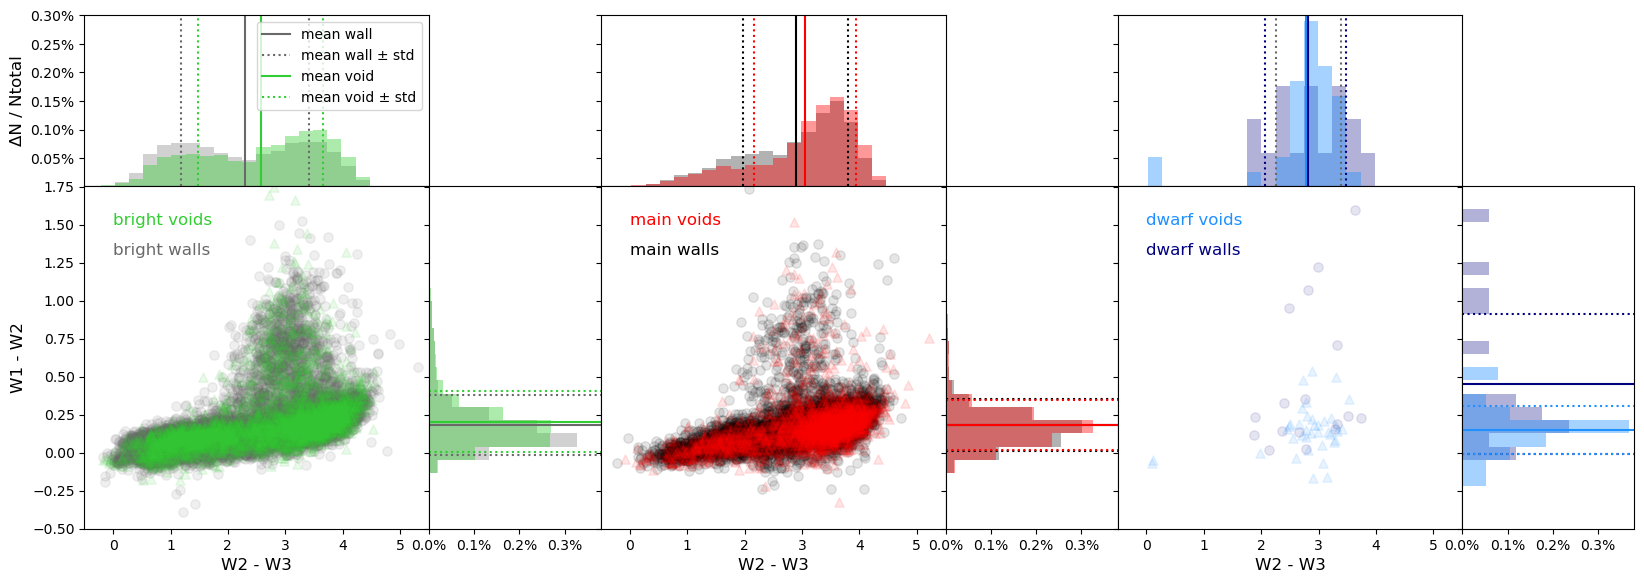

In [10]:
# plot color-color diagram!

num_bins = 20
num_bins_h = 30

# create a square image with four subplots (we will delete the top-right column later on)
fig, axs = plt.subplots(2, 6, 
                        sharex = 'col', 
                        sharey = 'row',
                        figsize = (20, 20.0/3.0), 
                        gridspec_kw = {'height_ratios': [1, 2],
                                     'width_ratios': [2, 1, 2, 1, 2, 1]} 
                       )

plt.subplots_adjust(wspace = 0, hspace = 0)

# fig.suptitle('Color–color diagram showing variable (r > 0. 85) void and wall galaxies', fontsize = 'x-large')

# BRIGHT

# axs[0, 0].set_title('Bright variable galaxies', fontsize = 'large')

# in the bottom left subplot, make a color-color diagram by plotting each galaxy by its two colors
# wall galaxies are in gray, while void galaxies are in blue
# use a low alpha value to avoid overplotting - there are a lot of overlapping points
axs[1, 0].scatter(walls_bright['W2-W3'], 
                  walls_bright['W1-W2'], 
                  s = 45, 
                  c = 'dimgray',
                  marker = 'o', 
                  label = 'walls',
                  alpha = 0.1)

axs[1, 0].scatter(voids_bright['W2-W3'], 
                  voids_bright['W1-W2'], 
                  s = 45,
                  c = 'limegreen',
                  marker = '^', # change symbol
                  label = 'void',
                  alpha = 0.1)

# axs[0, 0].set_ylim([0, 0.1])
# axs[0, 2].set_ylim([0, 0.1])
# axs[0, 4].set_ylim([0, 0.3])

# set the axes of the top left and bottom right subplots to be percentages
axs[0, 0].yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 2))
axs[1, 1].xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))

# only label the outer axes of the grouped subplots
for ax in axs.flat:
    ax.label_outer()

    
# make a histogram in the top left subplot that corresponds with the color on the x-axis of the diagram
# manually increase the number of bins to more clearly see the distribution
axs[0, 0].hist(walls_bright['W2-W3'], 
               color = 'dimgray',
               weights = np.ones_like(walls_bright['W2-W3']) / len(walls_bright['W2-W3']),
               alpha = 0.3,
              bins = np.linspace(walls_main['W2-W3'].min(), 
                                  walls_main['W2-W3'].max(), 
                                  num = num_bins, 
                                  endpoint = False))

axs[0, 0].hist(voids_bright['W2-W3'],
               color = 'limegreen',
               linewidth = 1.2,
               weights = np.ones_like(voids_bright['W2-W3']) / len(voids_bright['W2-W3']),
               alpha = 0.4,
               bins = np.linspace(walls_main['W2-W3'].min(), 
                                  walls_main['W2-W3'].max(), 
                                  num = num_bins, 
                                  endpoint = False))

# plot lines for the mean ± the standard deviation of the mean for both galaxy groups for each color
axs[0, 0].axvline(x = mean_walls_b_23, color = 'dimgrey', label = 'mean wall')
axs[0, 0].axvline(x = mean_walls_b_23 - std_walls_b_23, linestyle = 'dotted', color = 'dimgrey', label = 'mean wall ± std')
axs[0, 0].axvline(x = mean_walls_b_23 + std_walls_b_23, linestyle = 'dotted', color = 'dimgrey')

axs[0, 0].axvline(x = mean_voids_b_23, color = 'limegreen', label = 'mean void')
axs[0, 0].axvline(x = mean_voids_b_23 - std_voids_b_23, linestyle = 'dotted', color = 'limegreen', label = 'mean void ± std')
axs[0, 0].axvline(x = mean_voids_b_23 + std_voids_b_23, linestyle = 'dotted', color = 'limegreen')

# do the same for the bottom right subplot, except the histogram is horizontal
axs[1, 1].hist(walls_bright['W1-W2'],
               color = 'dimgray', 
               orientation='horizontal',
               weights = np.ones_like(walls_bright['W1-W2']) / len(walls_bright['W1-W2']),
               alpha = 0.3,
               bins = np.linspace(walls_main['W1-W2'].min(), 
                                  walls_main['W1-W2'].max(), 
                                  num = num_bins_h, 
                                  endpoint = False)
              )

axs[1, 1].hist(voids_bright['W1-W2'], 
               color = 'limegreen', 
               weights = np.ones_like(voids_bright['W1-W2']) / len(voids_bright['W1-W2']),
               alpha = 0.4,
               orientation='horizontal',
               bins = np.linspace(walls_main['W1-W2'].min(), 
                                  walls_main['W1-W2'].max(), 
                                  num = num_bins_h, 
                                  endpoint = False)
               )

axs[1, 1].axhline(y = mean_walls_b_12, color = 'dimgrey', label = 'mean wall')
axs[1, 1].axhline(y = mean_walls_b_12 - std_walls_b_12, linestyle = 'dotted', color = 'dimgrey', 
                  label = 'mean wall ± std')
axs[1, 1].axhline(y = mean_walls_b_12 + std_walls_b_12, linestyle = 'dotted', color = 'dimgrey')

axs[1, 1].axhline(y = mean_voids_b_12, color = 'limegreen', label = 'mean void')
axs[1, 1].axhline(y = mean_voids_b_12 - std_voids_b_12, linestyle = 'dotted', color = 'limegreen', 
                  label = 'mean voids ± std')
axs[1, 1].axhline(y = mean_voids_b_12 + std_voids_b_12, linestyle = 'dotted', color = 'limegreen')

# remove the unnecessary top right subplot
axs[0, 1].set_axis_off()

axs[1, 0].set_xlabel('W2 - W3', fontsize = 'large')
axs[1, 0].set_ylabel('W1 - W2', fontsize = 'large')

axs[0, 0].set_ylabel('ΔN / Ntotal', fontsize = 'large')

# set the ranges for the line segments that make up the wedge in which AGNs form, according to Mateos et al.
xp1 = np.linspace(1.958, 6.9, 100)
xp2 = np.linspace(2.25, 6.9, 100) # ~ 2.157 (Mateos et al.)
xp3 = np.linspace(1.958, 2.25, 100)

# calculate the y values for each line segment and plot
yp1 = (0.315 * xp1) + 0.796
yp2 = (0.315 * xp2) - 0.222
yp3 = (-3.172 * xp3) + 7.624

axs[0, 0].legend(loc = 'best')
# axs[1, 1].legend(loc = 'upper right')

# MAIN

# axs[0, 2].set_title('Main variable Galaxies', fontsize = 'large')

axs[1, 2].scatter(walls_main['W2-W3'], 
                  walls_main['W1-W2'], 
                  s = 45, 
                  c = 'black',
                  marker = 'o', 
                  label = 'walls',
                  alpha = 0.1)

axs[1, 2].scatter(voids_main['W2-W3'], 
                  voids_main['W1-W2'], 
                  s = 45,
                  c = 'red',
                  marker = '^', # change symbol
                  label = 'void',
                  alpha = 0.1)

# set the axes of the top left and bottom right subplots to be percentages
# axs[0, 2].yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))
axs[1, 3].xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))

# only label the outer axes of the grouped subplots
for ax in axs.flat:
    ax.label_outer()

# make a histogram in the top left subplot that corresponds with the color on the x-axis of the diagram
# manually increase the number of bins to more clearly see the distribution
axs[0, 2].hist(walls_main['W2-W3'], 
               color = 'black',
               weights = np.ones_like(walls_main['W2-W3']) / len(walls_main['W2-W3']),
               alpha = 0.3,
               bins = np.linspace(walls_main['W2-W3'].min(), 
                                  walls_main['W2-W3'].max(), 
                                  num = num_bins, 
                                  endpoint = False))

axs[0, 2].hist(voids_main['W2-W3'],
               color = 'red',
               linewidth = 1.2,
               weights = np.ones_like(voids_main['W2-W3']) / len(voids_main['W2-W3']),
               alpha = 0.4,
               bins = np.linspace(walls_main['W2-W3'].min(), 
                                  walls_main['W2-W3'].max(), 
                                  num = num_bins, 
                                  endpoint = False))

# plot lines for the mean ± the standard deviation of the mean for both galaxy groups for each color
axs[0, 2].axvline(x = mean_walls_m_23, color = 'black')
axs[0, 2].axvline(x = mean_walls_m_23 - std_walls_m_23, linestyle = 'dotted', color = 'black')
axs[0, 2].axvline(x = mean_walls_m_23 + std_walls_m_23, linestyle = 'dotted', color = 'black')

axs[0, 2].axvline(x = mean_voids_m_23, color = 'red')
axs[0, 2].axvline(x = mean_voids_m_23 - std_voids_m_23, linestyle = 'dotted', color = 'red')
axs[0, 2].axvline(x = mean_voids_m_23 + std_voids_m_23, linestyle = 'dotted', color = 'red')

# do the same for the bottom right subplot, except the histogram is horizontal
axs[1, 3].hist(walls_main['W1-W2'],
               color = 'black', 
               orientation='horizontal',
               weights = np.ones_like(walls_main['W1-W2']) / len(walls_main['W1-W2']),
               alpha = 0.3,
               bins = np.linspace(walls_main['W1-W2'].min(), 
                                  walls_main['W1-W2'].max(), 
                                  num = num_bins_h, 
                                  endpoint = False)
              )

axs[1, 3].hist(voids_main['W1-W2'], 
               color = 'red', 
               weights = np.ones_like(voids_main['W1-W2']) / len(voids_main['W1-W2']),
               alpha = 0.4,
               orientation='horizontal',
               bins = np.linspace(walls_main['W1-W2'].min(), 
                                  walls_main['W1-W2'].max(), 
                                  num = num_bins_h, 
                                  endpoint = False)
               )

axs[1, 3].axhline(y = mean_walls_m_12, color = 'black', label = 'mean wall')
axs[1, 3].axhline(y = mean_walls_m_12 - std_walls_m_12, linestyle = 'dotted', color = 'black', 
                  label = 'mean wall ± std')
axs[1, 3].axhline(y = mean_walls_m_12 + std_walls_m_12, linestyle = 'dotted', color = 'black')

axs[1, 3].axhline(y = mean_voids_m_12, color = 'red', label = 'mean void')
axs[1, 3].axhline(y = mean_voids_m_12 - std_voids_m_12, linestyle = 'dotted', color = 'red', 
                  label = 'mean voids ± std')
axs[1, 3].axhline(y = mean_voids_m_12 + std_voids_m_12, linestyle = 'dotted', color = 'red')

# remove the unnecessary top right subplot
axs[0, 1].set_axis_off()

axs[1, 2].set_xlabel('W2 - W3', fontsize = 'large')

axs[0, 2].set_ylabel('ΔN / Ntotal', fontsize = 'large')

# DWARF

# axs[0, 4].set_title('Dwarf variable galaxies', fontsize = 'large')

axs[1, 4].scatter(walls_dwarf['W2-W3'], 
                  walls_dwarf['W1-W2'], 
                  s = 45, 
                  c = 'navy',
                  marker = 'o', 
                  label = 'walls',
                  alpha = 0.1)

axs[1, 4].scatter(voids_dwarf['W2-W3'], 
                  voids_dwarf['W1-W2'], 
                  s = 45,
                  c = 'dodgerblue',
                  marker = '^', # change symbol
                  label = 'void',
                  alpha = 0.1)

# set the axes of the top left and bottom right subplots to be percentages
# axs[0, 4].yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))
axs[1, 5].xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))

# only label the outer axes of the grouped subplots
for ax in axs.flat:
    ax.label_outer()

# make a histogram in the top left subplot that corresponds with the color on the x-axis of the diagram
# manually increase the number of bins to more clearly see the distribution
axs[0, 4].hist(walls_dwarf['W2-W3'], 
               color = 'navy',
               weights = np.ones_like(walls_dwarf['W2-W3']) / len(walls_dwarf['W2-W3']),
               alpha = 0.3,
                bins = np.linspace(walls_main['W2-W3'].min(), 
                                  walls_main['W2-W3'].max(), 
                                  num = num_bins, 
                                  endpoint = False))

axs[0, 4].hist(voids_dwarf['W2-W3'],
               color = 'dodgerblue',
               linewidth = 1.2,
               weights = np.ones_like(voids_dwarf['W2-W3']) / len(voids_dwarf['W2-W3']),
               alpha = 0.4,
#                bins = np.linspace(voids_dwarf['W2-W3'].min(), 
#                                   voids_dwarf['W2-W3'].max(), 
#                                   num = num_bins, 
#                                   endpoint = False)
                bins = np.linspace(walls_main['W2-W3'].min(), 
                                  walls_main['W2-W3'].max(), 
                                  num = num_bins, 
                                  endpoint = False))

# plot lines for the mean ± the standard deviation of the mean for both galaxy groups for each color
axs[0, 4].axvline(x = mean_walls_d_23, color = 'navy')
axs[0, 4].axvline(x = mean_walls_d_23 - std_walls_d_23, linestyle = 'dotted', color = 'dimgrey')
axs[0, 4].axvline(x = mean_walls_d_23 + std_walls_d_23, linestyle = 'dotted', color = 'dimgrey')

axs[0, 4].axvline(x = mean_voids_d_23, color = 'dodgerblue')
axs[0, 4].axvline(x = mean_voids_d_23 - std_voids_d_23, linestyle = 'dotted', color = 'navy')
axs[0, 4].axvline(x = mean_voids_d_23 + std_voids_d_23, linestyle = 'dotted', color = 'navy')

# do the same for the bottom right subplot, except the histogram is horizontal
axs[1, 5].hist(walls_dwarf['W1-W2'],
               color = 'navy', 
               orientation='horizontal',
               weights = np.ones_like(walls_dwarf['W1-W2']) / len(walls_dwarf['W1-W2']),
               alpha = 0.3,
               bins = np.linspace(walls_main['W1-W2'].min(), 
                                  walls_main['W1-W2'].max(), 
                                  num = num_bins_h, 
                                  endpoint = False)
              )

axs[1, 5].hist(voids_dwarf['W1-W2'], 
               color = 'dodgerblue', 
               weights = np.ones_like(voids_dwarf['W1-W2']) / len(voids_dwarf['W1-W2']),
               alpha = 0.4,
               orientation='horizontal',
#                bins = np.linspace(voids_dwarf['W1-W2'].min(), 
#                                   voids_dwarf['W1-W2'].max(), 
#                                   num = num_bins,
#                                   endpoint = False)
              bins = np.linspace(walls_main['W1-W2'].min(), 
                                  walls_main['W1-W2'].max(), 
                                  num = num_bins_h, 
                                  endpoint = False)
               )

axs[1, 5].axhline(y = mean_walls_d_12, color = 'navy', label = 'mean wall')
axs[1, 5].axhline(y = mean_walls_d_12 - std_walls_d_12, linestyle = 'dotted', color = 'navy', 
                  label = 'mean wall ± std')
axs[1, 5].axhline(y = mean_walls_d_12 + std_walls_d_12, linestyle = 'dotted', color = 'navy')

axs[1, 5].axhline(y = mean_voids_d_12, color = 'dodgerblue', label = 'mean void')
axs[1, 5].axhline(y = mean_voids_d_12 - std_voids_d_12, linestyle = 'dotted', color = 'dodgerblue', 
                  label = 'mean voids ± std')
axs[1, 5].axhline(y = mean_voids_d_12 + std_voids_d_12, linestyle = 'dotted', color = 'dodgerblue')

# remove the unnecessary top right subplot
axs[0, 1].set_axis_off()
axs[0, 3].set_axis_off()
axs[0, 5].set_axis_off()

axs[1, 4].set_xlabel('W2 - W3', fontsize = 'large')

axs[1, 0].set_ylim([-0.5, 1.75])

axs[1, 0].set_xlim([-0.5, 5.5])
axs[1, 2].set_xlim([-0.5, 5.5])
axs[1, 4].set_xlim([-0.5, 5.5])

axs[0, 0].set_ylim(0.0001, 0.3)

axs[1, 1].set_xlim([0, 0.38])
axs[1, 3].set_xlim([0, 0.38])
axs[1, 5].set_xlim([0, 0.38])

axs[1, 0].text(0.0, 1.50, 'bright voids', ha = 'left', c = 'limegreen', size = 'large')
axs[1, 0].text(0.0, 1.30, 'bright walls', ha = 'left', c = 'dimgrey', size = 'large')

axs[1, 2].text(0.0, 1.50, 'main voids', ha = 'left', c = 'red', size = 'large')
axs[1, 2].text(0.0, 1.30, 'main walls', ha = 'left', c = 'black', size = 'large')

axs[1, 4].text(0.0, 1.50, 'dwarf voids', ha = 'left', c = 'dodgerblue', size = 'large')
axs[1, 4].text(0.0, 1.30, 'dwarf walls', ha = 'left', c = 'navy', size = 'large')

fig.savefig('Figures/iPoster-new_color-color-filtered-triple.png', dpi = 600)
plt.show()

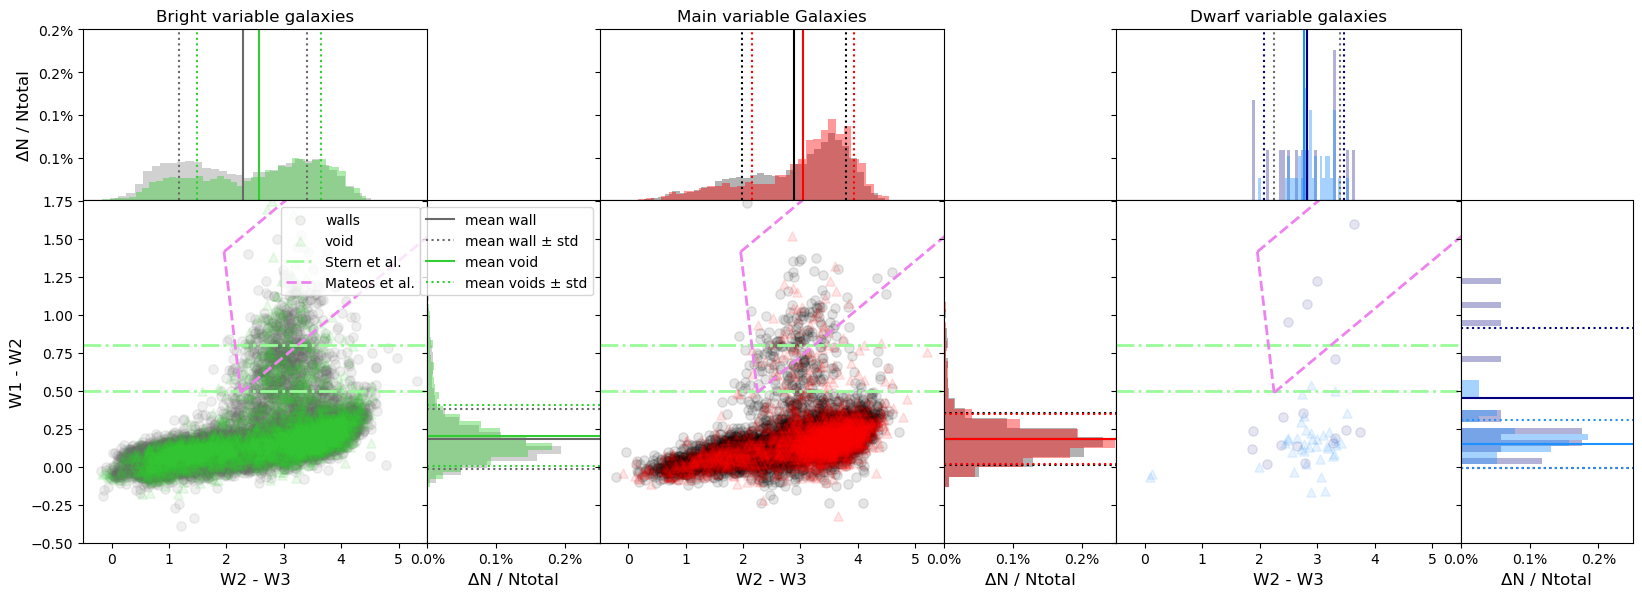

In [12]:
# plot color-color diagram!

# create a square image with four subplots (we will delete the top-right column later on)
fig, axs = plt.subplots(2, 6, 
                        sharex = 'col', 
                        sharey = 'row',
                        figsize = (20, 20/3.0), 
                        gridspec_kw = {'height_ratios': [1, 2],
                                     'width_ratios': [2, 1, 2, 1, 2, 1]} 
                       )

plt.subplots_adjust(wspace = 0, hspace = 0)

# fig.suptitle('Color–color diagram showing variable (r > 0. 85) void and wall galaxies', fontsize = 'x-large')

# BRIGHT

axs[0, 0].set_title('Bright variable galaxies', fontsize = 'large')

# in the bottom left subplot, make a color-color diagram by plotting each galaxy by its two colors
# wall galaxies are in gray, while void galaxies are in blue
# use a low alpha value to avoid overplotting - there are a lot of overlapping points
axs[1, 0].scatter(walls_bright['W2-W3'], 
                  walls_bright['W1-W2'], 
                  s = 45, 
                  c = 'dimgray',
                  marker = 'o', 
                  label = 'walls',
                  alpha = 0.1)

axs[1, 0].scatter(voids_bright['W2-W3'], 
                  voids_bright['W1-W2'], 
                  s = 45,
                  c = 'limegreen',
                  marker = '^', # change symbol
                  label = 'void',
                  alpha = 0.1)

axs[1, 0].set_ylim([-0.5, 1.75])

axs[1, 0].set_xlim([-0.5, 5.5])
axs[1, 2].set_xlim([-0.5, 5.5])
axs[1, 4].set_xlim([-0.5, 5.5])

axs[1, 1].set_xlim([0, 0.25])
axs[1, 3].set_xlim([0, 0.25])
axs[1, 5].set_xlim([0, 0.25])

# axs[0, 0].set_ylim([0, 0.1])
# axs[0, 2].set_ylim([0, 0.1])
# axs[0, 4].set_ylim([0, 0.3])

# set the axes of the top left and bottom right subplots to be percentages
axs[0, 0].yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))
axs[1, 1].xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))

# only label the outer axes of the grouped subplots
for ax in axs.flat:
    ax.label_outer()

    
# make a histogram in the top left subplot that corresponds with the color on the x-axis of the diagram
# manually increase the number of bins to more clearly see the distribution
axs[0, 0].hist(walls_bright['W2-W3'], 
               color = 'dimgray',
               weights = np.ones_like(walls_bright['W2-W3']) / len(walls_bright['W2-W3']),
               alpha = 0.3,
               bins = np.linspace(walls_bright['W2-W3'].min(), 
                                  walls_bright['W2-W3'].max(), 
                                  num = 40, 
                                  endpoint = False))

axs[0, 0].hist(voids_bright['W2-W3'],
               color = 'limegreen',
               linewidth = 1.2,
               weights = np.ones_like(voids_bright['W2-W3']) / len(voids_bright['W2-W3']),
               alpha = 0.4,
               bins = np.linspace(voids_bright['W2-W3'].min(), 
                                  voids_bright['W2-W3'].max(), 
                                  num = 40, 
                                  endpoint = False))

# plot lines for the mean ± the standard deviation of the mean for both galaxy groups for each color
axs[0, 0].axvline(x = mean_walls_b_23, color = 'dimgrey')
axs[0, 0].axvline(x = mean_walls_b_23 - std_walls_b_23, linestyle = 'dotted', color = 'dimgrey')
axs[0, 0].axvline(x = mean_walls_b_23 + std_walls_b_23, linestyle = 'dotted', color = 'dimgrey')

axs[0, 0].axvline(x = mean_voids_b_23, color = 'limegreen')
axs[0, 0].axvline(x = mean_voids_b_23 - std_voids_b_23, linestyle = 'dotted', color = 'limegreen')
axs[0, 0].axvline(x = mean_voids_b_23 + std_voids_b_23, linestyle = 'dotted', color = 'limegreen')

# do the same for the bottom right subplot, except the histogram is horizontal
axs[1, 1].hist(walls_bright['W1-W2'],
               color = 'dimgray', 
               orientation='horizontal',
               weights = np.ones_like(walls_bright['W1-W2']) / len(walls_bright['W1-W2']),
               alpha = 0.3,
               bins = np.linspace(walls_bright['W1-W2'].min(), 
                                  walls_bright['W1-W2'].max(), 
                                  num = 40, 
                                  endpoint = False)
              )

axs[1, 1].hist(voids_bright['W1-W2'], 
               color = 'limegreen', 
               weights = np.ones_like(voids_bright['W1-W2']) / len(voids_bright['W1-W2']),
               alpha = 0.4,
               orientation='horizontal',
               bins = np.linspace(voids_bright['W1-W2'].min(), 
                                  voids_bright['W1-W2'].max(), 
                                  num = 40,
                                  endpoint = False)
               )

axs[1, 1].axhline(y = mean_walls_b_12, color = 'dimgrey', label = 'mean wall')
axs[1, 1].axhline(y = mean_walls_b_12 - std_walls_b_12, linestyle = 'dotted', color = 'dimgrey', 
                  label = 'mean wall ± std')
axs[1, 1].axhline(y = mean_walls_b_12 + std_walls_b_12, linestyle = 'dotted', color = 'dimgrey')

axs[1, 1].axhline(y = mean_voids_b_12, color = 'limegreen', label = 'mean void')
axs[1, 1].axhline(y = mean_voids_b_12 - std_voids_b_12, linestyle = 'dotted', color = 'limegreen', 
                  label = 'mean voids ± std')
axs[1, 1].axhline(y = mean_voids_b_12 + std_voids_b_12, linestyle = 'dotted', color = 'limegreen')

# plot the horizontal lines above which AGNs form, according to Stern et al.
axs[1, 0].axhline(y = 0.8, color = 'palegreen', linestyle = 'dashdot', linewidth = 2, label = 'Stern et al.')
axs[1, 0].axhline(y = 0.5, color = 'palegreen', linestyle = 'dashdot', linewidth = 2)

# remove the unnecessary top right subplot
axs[0, 1].set_axis_off()

axs[1, 0].set_xlabel('W2 - W3', fontsize = 'large')
axs[1, 0].set_ylabel('W1 - W2', fontsize = 'large')

axs[0, 0].set_ylabel('ΔN / Ntotal', fontsize = 'large')
axs[0, 0].set_ylim(0.0001, 0.2)
axs[1, 1].set_xlabel('ΔN / Ntotal', fontsize = 'large')

# set the ranges for the line segments that make up the wedge in which AGNs form, according to Mateos et al.
xp1 = np.linspace(1.958, 6.9, 100)
xp2 = np.linspace(2.25, 6.9, 100) # ~ 2.157 (Mateos et al.)
xp3 = np.linspace(1.958, 2.25, 100)

# calculate the y values for each line segment and plot
yp1 = (0.315 * xp1) + 0.796
yp2 = (0.315 * xp2) - 0.222
yp3 = (-3.172 * xp3) + 7.624

axs[1, 0].plot(xp1, yp1, color = 'violet', linestyle = 'dashed', linewidth = 2, label = 'Mateos et al.')
axs[1, 0].plot(xp2, yp2, color = 'violet', linestyle = 'dashed', linewidth = 2)
axs[1, 0].plot(xp3, yp3, color = 'violet', linestyle = 'dashed', linewidth = 2)

axs[1, 0].legend(loc = 'upper right')
axs[1, 1].legend(loc = 'upper right')

# MAIN

axs[0, 2].set_title('Main variable Galaxies', fontsize = 'large')

axs[1, 2].scatter(walls_main['W2-W3'], 
                  walls_main['W1-W2'], 
                  s = 45, 
                  c = 'black',
                  marker = 'o', 
                  label = 'walls',
                  alpha = 0.1)

axs[1, 2].scatter(voids_main['W2-W3'], 
                  voids_main['W1-W2'], 
                  s = 45,
                  c = 'red',
                  marker = '^', # change symbol
                  label = 'void',
                  alpha = 0.1)

# set the axes of the top left and bottom right subplots to be percentages
# axs[0, 2].yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))
axs[1, 3].xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))

# only label the outer axes of the grouped subplots
for ax in axs.flat:
    ax.label_outer()

# make a histogram in the top left subplot that corresponds with the color on the x-axis of the diagram
# manually increase the number of bins to more clearly see the distribution
axs[0, 2].hist(walls_main['W2-W3'], 
               color = 'black',
               weights = np.ones_like(walls_main['W2-W3']) / len(walls_main['W2-W3']),
               alpha = 0.3,
               bins = np.linspace(walls_main['W2-W3'].min(), 
                                  walls_main['W2-W3'].max(), 
                                  num = 40, 
                                  endpoint = False))

axs[0, 2].hist(voids_main['W2-W3'],
               color = 'red',
               linewidth = 1.2,
               weights = np.ones_like(voids_main['W2-W3']) / len(voids_main['W2-W3']),
               alpha = 0.4,
               bins = np.linspace(voids_main['W2-W3'].min(), 
                                  voids_main['W2-W3'].max(), 
                                  num = 40, 
                                  endpoint = False))

# plot lines for the mean ± the standard deviation of the mean for both galaxy groups for each color
axs[0, 2].axvline(x = mean_walls_m_23, color = 'black')
axs[0, 2].axvline(x = mean_walls_m_23 - std_walls_m_23, linestyle = 'dotted', color = 'black')
axs[0, 2].axvline(x = mean_walls_m_23 + std_walls_m_23, linestyle = 'dotted', color = 'black')

axs[0, 2].axvline(x = mean_voids_m_23, color = 'red')
axs[0, 2].axvline(x = mean_voids_m_23 - std_voids_m_23, linestyle = 'dotted', color = 'red')
axs[0, 2].axvline(x = mean_voids_m_23 + std_voids_m_23, linestyle = 'dotted', color = 'red')

# do the same for the bottom right subplot, except the histogram is horizontal
axs[1, 3].hist(walls_main['W1-W2'],
               color = 'black', 
               orientation='horizontal',
               weights = np.ones_like(walls_main['W1-W2']) / len(walls_main['W1-W2']),
               alpha = 0.3,
               bins = np.linspace(walls_main['W1-W2'].min(), 
                                  walls_main['W1-W2'].max(), 
                                  num = 40, 
                                  endpoint = False)
              )

axs[1, 3].hist(voids_main['W1-W2'], 
               color = 'red', 
               weights = np.ones_like(voids_main['W1-W2']) / len(voids_main['W1-W2']),
               alpha = 0.4,
               orientation='horizontal',
               bins = np.linspace(voids_main['W1-W2'].min(), 
                                  voids_main['W1-W2'].max(), 
                                  num = 40,
                                  endpoint = False)
               )

axs[1, 3].axhline(y = mean_walls_m_12, color = 'black', label = 'mean wall')
axs[1, 3].axhline(y = mean_walls_m_12 - std_walls_m_12, linestyle = 'dotted', color = 'black', 
                  label = 'mean wall ± std')
axs[1, 3].axhline(y = mean_walls_m_12 + std_walls_m_12, linestyle = 'dotted', color = 'black')

axs[1, 3].axhline(y = mean_voids_m_12, color = 'red', label = 'mean void')
axs[1, 3].axhline(y = mean_voids_m_12 - std_voids_m_12, linestyle = 'dotted', color = 'red', 
                  label = 'mean voids ± std')
axs[1, 3].axhline(y = mean_voids_m_12 + std_voids_m_12, linestyle = 'dotted', color = 'red')

# plot the horizontal lines above which AGNs form, according to Stern et al.
axs[1, 2].axhline(y = 0.8, color = 'palegreen', linestyle = 'dashdot', linewidth = 2, label = 'Stern et al.')
axs[1, 2].axhline(y = 0.5, color = 'palegreen', linestyle = 'dashdot', linewidth = 2)

# remove the unnecessary top right subplot
axs[0, 1].set_axis_off()

axs[1, 2].set_xlabel('W2 - W3', fontsize = 'large')

axs[0, 2].set_ylabel('ΔN / Ntotal', fontsize = 'large')
axs[1, 3].set_xlabel('ΔN / Ntotal', fontsize = 'large')

axs[1, 2].plot(xp1, yp1, color = 'violet', linestyle = 'dashed', linewidth = 2, label = 'Mateos et al.')
axs[1, 2].plot(xp2, yp2, color = 'violet', linestyle = 'dashed', linewidth = 2)
axs[1, 2].plot(xp3, yp3, color = 'violet', linestyle = 'dashed', linewidth = 2)

# DWARF

axs[0, 4].set_title('Dwarf variable galaxies', fontsize = 'large')

axs[1, 4].scatter(walls_dwarf['W2-W3'], 
                  walls_dwarf['W1-W2'], 
                  s = 45, 
                  c = 'navy',
                  marker = 'o', 
                  label = 'walls',
                  alpha = 0.1)

axs[1, 4].scatter(voids_dwarf['W2-W3'], 
                  voids_dwarf['W1-W2'], 
                  s = 45,
                  c = 'dodgerblue',
                  marker = '^', # change symbol
                  label = 'void',
                  alpha = 0.1)

# set the axes of the top left and bottom right subplots to be percentages
# axs[0, 4].yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))
axs[1, 5].xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))

# only label the outer axes of the grouped subplots
for ax in axs.flat:
    ax.label_outer()

# make a histogram in the top left subplot that corresponds with the color on the x-axis of the diagram
# manually increase the number of bins to more clearly see the distribution
axs[0, 4].hist(walls_dwarf['W2-W3'], 
               color = 'navy',
               weights = np.ones_like(walls_dwarf['W2-W3']) / len(walls_dwarf['W2-W3']),
               alpha = 0.3,
               bins = np.linspace(walls_dwarf['W2-W3'].min(), 
                                  walls_dwarf['W2-W3'].max(), 
                                  num = 40, 
                                  endpoint = False)
              )

axs[0, 4].hist(voids_dwarf['W2-W3'],
               color = 'dodgerblue',
               linewidth = 1.2,
               weights = np.ones_like(voids_dwarf['W2-W3']) / len(voids_dwarf['W2-W3']),
               alpha = 0.4,
#                bins = np.linspace(voids_dwarf['W2-W3'].min(), 
#                                   voids_dwarf['W2-W3'].max(), 
#                                   num = 40, 
#                                   endpoint = False)
                bins = np.linspace(walls_dwarf['W2-W3'].min(), 
                                  walls_dwarf['W2-W3'].max(), 
                                  num = 40, 
                                  endpoint = False)
              )

# plot lines for the mean ± the standard deviation of the mean for both galaxy groups for each color
axs[0, 4].axvline(x = mean_walls_d_23, color = 'navy')
axs[0, 4].axvline(x = mean_walls_d_23 - std_walls_d_23, linestyle = 'dotted', color = 'dimgrey')
axs[0, 4].axvline(x = mean_walls_d_23 + std_walls_d_23, linestyle = 'dotted', color = 'dimgrey')

axs[0, 4].axvline(x = mean_voids_d_23, color = 'dodgerblue')
axs[0, 4].axvline(x = mean_voids_d_23 - std_voids_d_23, linestyle = 'dotted', color = 'navy')
axs[0, 4].axvline(x = mean_voids_d_23 + std_voids_d_23, linestyle = 'dotted', color = 'navy')

# do the same for the bottom right subplot, except the histogram is horizontal
axs[1, 5].hist(walls_dwarf['W1-W2'],
               color = 'navy', 
               orientation='horizontal',
               weights = np.ones_like(walls_dwarf['W1-W2']) / len(walls_dwarf['W1-W2']),
               alpha = 0.3,
               bins = np.linspace(walls_dwarf['W1-W2'].min(), 
                                  walls_dwarf['W1-W2'].max(), 
                                  num = 40, 
                                  endpoint = False)
              )

axs[1, 5].hist(voids_dwarf['W1-W2'], 
               color = 'dodgerblue', 
               weights = np.ones_like(voids_dwarf['W1-W2']) / len(voids_dwarf['W1-W2']),
               alpha = 0.4,
               orientation='horizontal',
#                bins = np.linspace(voids_dwarf['W1-W2'].min(), 
#                                   voids_dwarf['W1-W2'].max(), 
#                                   num = 40,
#                                   endpoint = False)
              bins = np.linspace(walls_dwarf['W1-W2'].min(), 
                                  walls_dwarf['W1-W2'].max(), 
                                  num = 40, 
                                  endpoint = False)
               )

axs[1, 5].axhline(y = mean_walls_d_12, color = 'navy', label = 'mean wall')
axs[1, 5].axhline(y = mean_walls_d_12 - std_walls_d_12, linestyle = 'dotted', color = 'navy', 
                  label = 'mean wall ± std')
axs[1, 5].axhline(y = mean_walls_d_12 + std_walls_d_12, linestyle = 'dotted', color = 'navy')

axs[1, 5].axhline(y = mean_voids_d_12, color = 'dodgerblue', label = 'mean void')
axs[1, 5].axhline(y = mean_voids_d_12 - std_voids_d_12, linestyle = 'dotted', color = 'dodgerblue', 
                  label = 'mean voids ± std')
axs[1, 5].axhline(y = mean_voids_d_12 + std_voids_d_12, linestyle = 'dotted', color = 'dodgerblue')

# plot the horizontal lines above which AGNs form, according to Stern et al.
axs[1, 4].axhline(y = 0.8, color = 'palegreen', linestyle = 'dashdot', linewidth = 2, label = 'Stern et al.')
axs[1, 4].axhline(y = 0.5, color = 'palegreen', linestyle = 'dashdot', linewidth = 2)

# remove the unnecessary top right subplot
axs[0, 1].set_axis_off()
axs[0, 3].set_axis_off()
axs[0, 5].set_axis_off()

axs[1, 4].set_xlabel('W2 - W3', fontsize = 'large')

# axs[0, 4].set_ylabel('ΔN / Ntotal', fontsize = 'large')
axs[1, 5].set_xlabel('ΔN / Ntotal', fontsize = 'large')

axs[1, 4].plot(xp1, yp1, color = 'violet', linestyle = 'dashed', linewidth = 2, label = 'Mateos et al.')
axs[1, 4].plot(xp2, yp2, color = 'violet', linestyle = 'dashed', linewidth = 2)
axs[1, 4].plot(xp3, yp3, color = 'violet', linestyle = 'dashed', linewidth = 2)

# fig.savefig('Figures/new_color-color-filtered-triple.png', dpi = 600)
plt.show()

### Create Percentage Table

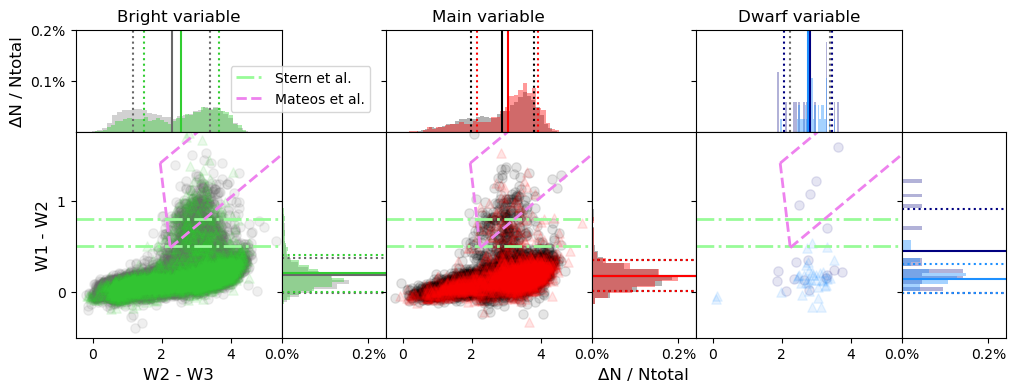

In [11]:
# plot color-color diagram!

# create a square image with four subplots (we will delete the top-right column later on)
fig, axs = plt.subplots(2, 6, 
                        sharex = 'col', 
                        sharey = 'row',
                        figsize = (12, 4), 
                        gridspec_kw = {'height_ratios': [1, 2],
                                     'width_ratios': [2, 1, 2, 1, 2, 1]} 
                       )

plt.subplots_adjust(wspace = 0, hspace = 0)

# fig.suptitle('Color–color diagram showing variable (r > 0. 85) void and wall galaxies', fontsize = 'x-large')

# BRIGHT

axs[0, 0].set_title('Bright variable', fontsize = 'large')

# in the bottom left subplot, make a color-color diagram by plotting each galaxy by its two colors
# wall galaxies are in gray, while void galaxies are in blue
# use a low alpha value to avoid overplotting - there are a lot of overlapping points
axs[1, 0].scatter(walls_bright['W2-W3'], 
                  walls_bright['W1-W2'], 
                  s = 45, 
                  c = 'dimgray',
                  marker = 'o', 
#                   label = 'walls',
                  alpha = 0.1)

axs[1, 0].scatter(voids_bright['W2-W3'], 
                  voids_bright['W1-W2'], 
                  s = 45,
                  c = 'limegreen',
                  marker = '^', # change symbol
#                   label = 'void',
                  alpha = 0.1)

axs[1, 0].set_ylim([-0.5, 1.75])

axs[1, 0].set_xlim([-0.5, 5.5])
axs[1, 2].set_xlim([-0.5, 5.5])
axs[1, 4].set_xlim([-0.5, 5.5])

axs[1, 1].set_xlim([0, 0.30])
axs[1, 3].set_xlim([0, 0.30])
axs[1, 5].set_xlim([0, 0.30])

# axs[0, 0].set_ylim([0, 0.1])
# axs[0, 2].set_ylim([0, 0.1])
# axs[0, 4].set_ylim([0, 0.3])

# set the axes of the top left and bottom right subplots to be percentages
axs[0, 0].yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))
axs[1, 1].xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))

# only label the outer axes of the grouped subplots
for ax in axs.flat:
    ax.label_outer()

    
# make a histogram in the top left subplot that corresponds with the color on the x-axis of the diagram
# manually increase the number of bins to more clearly see the distribution
axs[0, 0].hist(walls_bright['W2-W3'], 
               color = 'dimgray',
               weights = np.ones_like(walls_bright['W2-W3']) / len(walls_bright['W2-W3']),
               alpha = 0.3,
               bins = np.linspace(walls_bright['W2-W3'].min(), 
                                  walls_bright['W2-W3'].max(), 
                                  num = 40, 
                                  endpoint = False))

axs[0, 0].hist(voids_bright['W2-W3'],
               color = 'limegreen',
               linewidth = 1.2,
               weights = np.ones_like(voids_bright['W2-W3']) / len(voids_bright['W2-W3']),
               alpha = 0.4,
               bins = np.linspace(voids_bright['W2-W3'].min(), 
                                  voids_bright['W2-W3'].max(), 
                                  num = 40, 
                                  endpoint = False))

# plot lines for the mean ± the standard deviation of the mean for both galaxy groups for each color
axs[0, 0].axvline(x = mean_walls_b_23, color = 'dimgrey')
axs[0, 0].axvline(x = mean_walls_b_23 - std_walls_b_23, linestyle = 'dotted', color = 'dimgrey')
axs[0, 0].axvline(x = mean_walls_b_23 + std_walls_b_23, linestyle = 'dotted', color = 'dimgrey')

axs[0, 0].axvline(x = mean_voids_b_23, color = 'limegreen')
axs[0, 0].axvline(x = mean_voids_b_23 - std_voids_b_23, linestyle = 'dotted', color = 'limegreen')
axs[0, 0].axvline(x = mean_voids_b_23 + std_voids_b_23, linestyle = 'dotted', color = 'limegreen')

# do the same for the bottom right subplot, except the histogram is horizontal
axs[1, 1].hist(walls_bright['W1-W2'],
               color = 'dimgray', 
               orientation='horizontal',
               weights = np.ones_like(walls_bright['W1-W2']) / len(walls_bright['W1-W2']),
               alpha = 0.3,
               bins = np.linspace(walls_bright['W1-W2'].min(), 
                                  walls_bright['W1-W2'].max(), 
                                  num = 40, 
                                  endpoint = False)
              )

axs[1, 1].hist(voids_bright['W1-W2'], 
               color = 'limegreen', 
               weights = np.ones_like(voids_bright['W1-W2']) / len(voids_bright['W1-W2']),
               alpha = 0.4,
               orientation='horizontal',
               bins = np.linspace(voids_bright['W1-W2'].min(), 
                                  voids_bright['W1-W2'].max(), 
                                  num = 40,
                                  endpoint = False)
               )

axs[1, 1].axhline(y = mean_walls_b_12, color = 'dimgrey')
# label = 'mean wall')
axs[1, 1].axhline(y = mean_walls_b_12 - std_walls_b_12, linestyle = 'dotted', color = 'dimgrey') 
#                   label = 'mean wall ± std')
axs[1, 1].axhline(y = mean_walls_b_12 + std_walls_b_12, linestyle = 'dotted', color = 'dimgrey')

axs[1, 1].axhline(y = mean_voids_b_12, color = 'limegreen')
# label = 'mean void')
axs[1, 1].axhline(y = mean_voids_b_12 - std_voids_b_12, linestyle = 'dotted', color = 'limegreen') 
#                   label = 'mean voids ± std')
axs[1, 1].axhline(y = mean_voids_b_12 + std_voids_b_12, linestyle = 'dotted', color = 'limegreen')

# plot the horizontal lines above which AGNs form, according to Stern et al.
axs[1, 0].axhline(y = 0.8, color = 'palegreen', linestyle = 'dashdot', linewidth = 2, label = 'Stern et al.')
axs[1, 0].axhline(y = 0.5, color = 'palegreen', linestyle = 'dashdot', linewidth = 2)

# remove the unnecessary top right subplot
axs[0, 1].set_axis_off()

axs[1, 0].set_xlabel('W2 - W3', fontsize = 'large')
axs[1, 0].set_ylabel('W1 - W2', fontsize = 'large')

axs[0, 0].set_ylabel('ΔN / Ntotal', fontsize = 'large')
axs[0, 0].set_ylim(0.0001, 0.2)
# axs[1, 1].set_xlabel('ΔN / Ntotal', fontsize = 'large')

# set the ranges for the line segments that make up the wedge in which AGNs form, according to Mateos et al.
xp1 = np.linspace(1.958, 6.9, 100)
xp2 = np.linspace(2.25, 6.9, 100) # ~ 2.157 (Mateos et al.)
xp3 = np.linspace(1.958, 2.25, 100)

# calculate the y values for each line segment and plot
yp1 = (0.315 * xp1) + 0.796
yp2 = (0.315 * xp2) - 0.222
yp3 = (-3.172 * xp3) + 7.624

axs[1, 0].plot(xp1, yp1, color = 'violet', linestyle = 'dashed', linewidth = 2, label = 'Mateos et al.')
axs[1, 0].plot(xp2, yp2, color = 'violet', linestyle = 'dashed', linewidth = 2)
axs[1, 0].plot(xp3, yp3, color = 'violet', linestyle = 'dashed', linewidth = 2)

axs[1, 0].legend(bbox_to_anchor=(0.75, 1.1), loc='lower left', borderaxespad=0)
# axs[1, 1].legend(loc = 'upper right')

# MAIN

axs[0, 2].set_title('Main variable', fontsize = 'large')

axs[1, 2].scatter(walls_main['W2-W3'], 
                  walls_main['W1-W2'], 
                  s = 45, 
                  c = 'black',
                  marker = 'o', 
                  label = 'walls',
                  alpha = 0.1)

axs[1, 2].scatter(voids_main['W2-W3'], 
                  voids_main['W1-W2'], 
                  s = 45,
                  c = 'red',
                  marker = '^', # change symbol
                  label = 'void',
                  alpha = 0.1)

# set the axes of the top left and bottom right subplots to be percentages
# axs[0, 2].yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))
axs[1, 3].xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))

# only label the outer axes of the grouped subplots
for ax in axs.flat:
    ax.label_outer()

# make a histogram in the top left subplot that corresponds with the color on the x-axis of the diagram
# manually increase the number of bins to more clearly see the distribution
axs[0, 2].hist(walls_main['W2-W3'], 
               color = 'black',
               weights = np.ones_like(walls_main['W2-W3']) / len(walls_main['W2-W3']),
               alpha = 0.3,
               bins = np.linspace(walls_main['W2-W3'].min(), 
                                  walls_main['W2-W3'].max(), 
                                  num = 40, 
                                  endpoint = False))

axs[0, 2].hist(voids_main['W2-W3'],
               color = 'red',
               linewidth = 1.2,
               weights = np.ones_like(voids_main['W2-W3']) / len(voids_main['W2-W3']),
               alpha = 0.4,
               bins = np.linspace(voids_main['W2-W3'].min(), 
                                  voids_main['W2-W3'].max(), 
                                  num = 40, 
                                  endpoint = False))

# plot lines for the mean ± the standard deviation of the mean for both galaxy groups for each color
axs[0, 2].axvline(x = mean_walls_m_23, color = 'black')
axs[0, 2].axvline(x = mean_walls_m_23 - std_walls_m_23, linestyle = 'dotted', color = 'black')
axs[0, 2].axvline(x = mean_walls_m_23 + std_walls_m_23, linestyle = 'dotted', color = 'black')

axs[0, 2].axvline(x = mean_voids_m_23, color = 'red')
axs[0, 2].axvline(x = mean_voids_m_23 - std_voids_m_23, linestyle = 'dotted', color = 'red')
axs[0, 2].axvline(x = mean_voids_m_23 + std_voids_m_23, linestyle = 'dotted', color = 'red')

# do the same for the bottom right subplot, except the histogram is horizontal
axs[1, 3].hist(walls_main['W1-W2'],
               color = 'black', 
               orientation='horizontal',
               weights = np.ones_like(walls_main['W1-W2']) / len(walls_main['W1-W2']),
               alpha = 0.3,
               bins = np.linspace(walls_main['W1-W2'].min(), 
                                  walls_main['W1-W2'].max(), 
                                  num = 40, 
                                  endpoint = False)
              )

axs[1, 3].hist(voids_main['W1-W2'], 
               color = 'red', 
               weights = np.ones_like(voids_main['W1-W2']) / len(voids_main['W1-W2']),
               alpha = 0.4,
               orientation='horizontal',
               bins = np.linspace(voids_main['W1-W2'].min(), 
                                  voids_main['W1-W2'].max(), 
                                  num = 40,
                                  endpoint = False)
               )

axs[1, 3].axhline(y = mean_walls_m_12, color = 'black', label = 'mean wall')
axs[1, 3].axhline(y = mean_walls_m_12 - std_walls_m_12, linestyle = 'dotted', color = 'black') 
#                   label = 'mean wall ± std')
axs[1, 3].axhline(y = mean_walls_m_12 + std_walls_m_12, linestyle = 'dotted', color = 'black')

axs[1, 3].axhline(y = mean_voids_m_12, color = 'red', label = 'mean void')
axs[1, 3].axhline(y = mean_voids_m_12 - std_voids_m_12, linestyle = 'dotted', color = 'red') 
#                   label = 'mean voids ± std')
axs[1, 3].axhline(y = mean_voids_m_12 + std_voids_m_12, linestyle = 'dotted', color = 'red')

# plot the horizontal lines above which AGNs form, according to Stern et al.
axs[1, 2].axhline(y = 0.8, color = 'palegreen', linestyle = 'dashdot', linewidth = 2, label = 'Stern et al.')
axs[1, 2].axhline(y = 0.5, color = 'palegreen', linestyle = 'dashdot', linewidth = 2)

# remove the unnecessary top right subplot
axs[0, 1].set_axis_off()

# axs[1, 2].set_xlabel('W2 - W3', fontsize = 'large')

axs[0, 2].set_ylabel('ΔN / Ntotal', fontsize = 'large')
axs[1, 3].set_xlabel('ΔN / Ntotal', fontsize = 'large')

axs[1, 2].plot(xp1, yp1, color = 'violet', linestyle = 'dashed', linewidth = 2, label = 'Mateos et al.')
axs[1, 2].plot(xp2, yp2, color = 'violet', linestyle = 'dashed', linewidth = 2)
axs[1, 2].plot(xp3, yp3, color = 'violet', linestyle = 'dashed', linewidth = 2)

# DWARF

axs[0, 4].set_title('Dwarf variable', fontsize = 'large')

axs[1, 4].scatter(walls_dwarf['W2-W3'], 
                  walls_dwarf['W1-W2'], 
                  s = 45, 
                  c = 'navy',
                  marker = 'o', 
                  label = 'walls',
                  alpha = 0.1)

axs[1, 4].scatter(voids_dwarf['W2-W3'], 
                  voids_dwarf['W1-W2'], 
                  s = 45,
                  c = 'dodgerblue',
                  marker = '^', # change symbol
                  label = 'void',
                  alpha = 0.1)

# set the axes of the top left and bottom right subplots to be percentages
# axs[0, 4].yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))
axs[1, 5].xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))

# only label the outer axes of the grouped subplots
for ax in axs.flat:
    ax.label_outer()

# make a histogram in the top left subplot that corresponds with the color on the x-axis of the diagram
# manually increase the number of bins to more clearly see the distribution
axs[0, 4].hist(walls_dwarf['W2-W3'], 
               color = 'navy',
               weights = np.ones_like(walls_dwarf['W2-W3']) / len(walls_dwarf['W2-W3']),
               alpha = 0.3,
               bins = np.linspace(walls_dwarf['W2-W3'].min(), 
                                  walls_dwarf['W2-W3'].max(), 
                                  num = 40, 
                                  endpoint = False)
              )

axs[0, 4].hist(voids_dwarf['W2-W3'],
               color = 'dodgerblue',
               linewidth = 1.2,
               weights = np.ones_like(voids_dwarf['W2-W3']) / len(voids_dwarf['W2-W3']),
               alpha = 0.4,
#                bins = np.linspace(voids_dwarf['W2-W3'].min(), 
#                                   voids_dwarf['W2-W3'].max(), 
#                                   num = 40, 
#                                   endpoint = False)
                bins = np.linspace(walls_dwarf['W2-W3'].min(), 
                                  walls_dwarf['W2-W3'].max(), 
                                  num = 40, 
                                  endpoint = False)
              )

# plot lines for the mean ± the standard deviation of the mean for both galaxy groups for each color
axs[0, 4].axvline(x = mean_walls_d_23, color = 'navy')
axs[0, 4].axvline(x = mean_walls_d_23 - std_walls_d_23, linestyle = 'dotted', color = 'dimgrey')
axs[0, 4].axvline(x = mean_walls_d_23 + std_walls_d_23, linestyle = 'dotted', color = 'dimgrey')

axs[0, 4].axvline(x = mean_voids_d_23, color = 'dodgerblue')
axs[0, 4].axvline(x = mean_voids_d_23 - std_voids_d_23, linestyle = 'dotted', color = 'navy')
axs[0, 4].axvline(x = mean_voids_d_23 + std_voids_d_23, linestyle = 'dotted', color = 'navy')

# do the same for the bottom right subplot, except the histogram is horizontal
axs[1, 5].hist(walls_dwarf['W1-W2'],
               color = 'navy', 
               orientation='horizontal',
               weights = np.ones_like(walls_dwarf['W1-W2']) / len(walls_dwarf['W1-W2']),
               alpha = 0.3,
               bins = np.linspace(walls_dwarf['W1-W2'].min(), 
                                  walls_dwarf['W1-W2'].max(), 
                                  num = 40, 
                                  endpoint = False)
              )

axs[1, 5].hist(voids_dwarf['W1-W2'], 
               color = 'dodgerblue', 
               weights = np.ones_like(voids_dwarf['W1-W2']) / len(voids_dwarf['W1-W2']),
               alpha = 0.4,
               orientation='horizontal',
#                bins = np.linspace(voids_dwarf['W1-W2'].min(), 
#                                   voids_dwarf['W1-W2'].max(), 
#                                   num = 40,
#                                   endpoint = False)
              bins = np.linspace(walls_dwarf['W1-W2'].min(), 
                                  walls_dwarf['W1-W2'].max(), 
                                  num = 40, 
                                  endpoint = False)
               )

axs[1, 5].axhline(y = mean_walls_d_12, color = 'navy', label = 'mean wall')
axs[1, 5].axhline(y = mean_walls_d_12 - std_walls_d_12, linestyle = 'dotted', color = 'navy') 
#                   label = 'mean wall ± std')
axs[1, 5].axhline(y = mean_walls_d_12 + std_walls_d_12, linestyle = 'dotted', color = 'navy')

axs[1, 5].axhline(y = mean_voids_d_12, color = 'dodgerblue', label = 'mean void')
axs[1, 5].axhline(y = mean_voids_d_12 - std_voids_d_12, linestyle = 'dotted', color = 'dodgerblue') 
#                   label = 'mean voids ± std')
axs[1, 5].axhline(y = mean_voids_d_12 + std_voids_d_12, linestyle = 'dotted', color = 'dodgerblue')

# plot the horizontal lines above which AGNs form, according to Stern et al.
axs[1, 4].axhline(y = 0.8, color = 'palegreen', linestyle = 'dashdot', linewidth = 2, label = 'Stern et al.')
axs[1, 4].axhline(y = 0.5, color = 'palegreen', linestyle = 'dashdot', linewidth = 2)

# remove the unnecessary top right subplot
axs[0, 1].set_axis_off()
axs[0, 3].set_axis_off()
axs[0, 5].set_axis_off()

# axs[1, 4].set_xlabel('W2 - W3', fontsize = 'large')

# axs[0, 4].set_ylabel('ΔN / Ntotal', fontsize = 'large')
# axs[1, 5].set_xlabel('ΔN / Ntotal', fontsize = 'large')

axs[1, 4].plot(xp1, yp1, color = 'violet', linestyle = 'dashed', linewidth = 2, label = 'Mateos et al.')
axs[1, 4].plot(xp2, yp2, color = 'violet', linestyle = 'dashed', linewidth = 2)
axs[1, 4].plot(xp3, yp3, color = 'violet', linestyle = 'dashed', linewidth = 2)

plt.rcParams.update({'font.size': 16})

fig.savefig('Figures/SVRSEF_new_color-color-filtered-triple.png', 
            bbox_inches = 'tight', dpi = 600)
plt.show()

# Percent tables

In [12]:
# find the fraction of galaxies in both groups that have colors above the Stern et al. lines
voids_p80 = len(voids_bright[(voids_bright['W1-W2'] > 0.8)]) / len(voids_bright)
voids_p50 = len(voids_bright[(voids_bright['W1-W2'] > 0.5)]) / len(voids_bright)

# find the associated eror
err_voids_p80 = get_err_frac(len(voids_bright[(voids_bright['W1-W2'] > 0.8)]), len(voids_bright))
err_voids_p50 = get_err_frac(len(voids_bright[(voids_bright['W1-W2'] > 0.5)]), len(voids_bright))

walls_p80 = len(walls_bright[(walls_bright['W1-W2'] > 0.8)]) / len(walls_bright)
walls_p50 = len(walls_bright[(walls_bright['W1-W2'] > 0.5)]) / len(walls_bright)

err_walls_p80 = get_err_frac(len(walls_bright[(walls_bright['W1-W2'] > 0.8)]), len(walls_bright))
err_walls_p50 = get_err_frac(len(walls_bright[(walls_bright['W1-W2'] > 0.5)]), len(walls_bright))

# count number of points within wedge by Mateos et al. by using linear inequalities

count_voids = 0
count_walls = 0

x = 'W2-W3'
y = 'W1-W2'

voids_row_list = list(range(len(voids_bright)))
walls_row_list = list(range(len(walls_bright)))

# points must have values that are within all three lines making up the wedge
for i in voids_row_list:
    if((voids_bright.iloc[i][y] > (0.315 * voids_bright.iloc[i][x]) - 0.222) and
       (voids_bright.iloc[i][y] < (0.315 * voids_bright.iloc[i][x]) + 0.796) and
       (voids_bright.iloc[i][y] > (-3.172 * voids_bright.iloc[i][x]) + 7.624)):
        
        count_voids += 1
        
for i in walls_row_list:
    if((walls_bright.iloc[i][y] > (0.315 * walls_bright.iloc[i][x]) - 0.222) and
       (walls_bright.iloc[i][y] < (0.315 * walls_bright.iloc[i][x]) + 0.796) and
       (walls_bright.iloc[i][y] > (-3.172 * walls_bright.iloc[i][x]) + 7.624)):
        
        count_walls += 1

voids_percent_wedge = count_voids / len(voids_bright)
walls_percent_wedge = count_walls / len(walls_bright)

err_voids_wedge = get_err_frac(count_voids, len(voids_bright))
err_walls_wedge = get_err_frac(count_walls, len(walls_bright))

percent_table = pd.DataFrame([['bright voids', 
                               str(round(voids_p50, 3)) + err_voids_p50, 
                               str(round(voids_p80, 3)) + err_voids_p80,
                               str(round(voids_percent_wedge, 3)) + err_voids_wedge],
                              
                              ['bright walls', 
                               str(round(walls_p50, 3)) + err_walls_p50, 
                               str(round(walls_p80, 3)) + err_walls_p80,
                               str(round(walls_percent_wedge, 3)) + err_walls_wedge]],
                             
                             columns = ['Galaxy', 
                                        'Fraction with W1 - W2 ≥ 0.5', 
                                        'Fraction with W1 - W2 ≥ 0.8', 
                                        'Fraction within Mateos et al. wedge'])

percent_table

,Galaxy,Fraction with W1 - W2 ≥ 0.5,Fraction with W1 - W2 ≥ 0.8,Fraction within Mateos et al. wedge
0,bright voids,0.077 ± 0.01,0.027 ± 0.0,0.035 ± 0.0
1,bright walls,0.071 ± 0.0,0.024 ± 0.0,0.034 ± 0.0


In [13]:
## Percentages, not Fractions

# find the fraction of galaxies in both groups that have colors above the Stern et al. lines
voids_p80 = len(voids_bright[(voids_bright['W1-W2'] > 0.8)]) / len(voids_bright)
voids_p50 = len(voids_bright[(voids_bright['W1-W2'] > 0.5)]) / len(voids_bright)

# find the associated eror
err_voids_p80 = get_err_percent(len(voids_bright[(voids_bright['W1-W2'] > 0.8)]), len(voids_bright))
err_voids_p50 = get_err_percent(len(voids_bright[(voids_bright['W1-W2'] > 0.5)]), len(voids_bright))

walls_p80 = len(walls_bright[(walls_bright['W1-W2'] > 0.8)]) / len(walls_bright)
walls_p50 = len(walls_bright[(walls_bright['W1-W2'] > 0.5)]) / len(walls_bright)

err_walls_p80 = get_err_percent(len(walls_bright[(walls_bright['W1-W2'] > 0.8)]), len(walls_bright))
err_walls_p50 = get_err_percent(len(walls_bright[(walls_bright['W1-W2'] > 0.5)]), len(walls_bright))

# count number of points within wedge by Mateos et al. by using linear inequalities

count_voids = 0
count_walls = 0

x = 'W2-W3'
y = 'W1-W2'

voids_row_list = list(range(len(voids_bright)))
walls_row_list = list(range(len(walls_bright)))

# points must have values that are within all three lines making up the wedge
for i in voids_row_list:
    if((voids_bright.iloc[i][y] > (0.315 * voids_bright.iloc[i][x]) - 0.222) and
       (voids_bright.iloc[i][y] < (0.315 * voids_bright.iloc[i][x]) + 0.796) and
       (voids_bright.iloc[i][y] > (-3.172 * voids_bright.iloc[i][x]) + 7.624)):
        
        count_voids += 1
        
for i in walls_row_list:
    if((walls_bright.iloc[i][y] > (0.315 * walls_bright.iloc[i][x]) - 0.222) and
       (walls_bright.iloc[i][y] < (0.315 * walls_bright.iloc[i][x]) + 0.796) and
       (walls_bright.iloc[i][y] > (-3.172 * walls_bright.iloc[i][x]) + 7.624)):
        
        count_walls += 1

voids_percent_wedge = count_voids / len(voids_bright)
walls_percent_wedge = count_walls / len(walls_bright)

err_voids_wedge = get_err_percent(count_voids, len(voids_bright))
err_walls_wedge = get_err_percent(count_walls, len(walls_bright))

percent_table = pd.DataFrame([['bright voids', 
                               str(round(voids_p50 * 100, 2)) + err_voids_p50, 
                               str(round(voids_p80 * 100, 2)) + err_voids_p80,
                               str(round(voids_percent_wedge * 100, 2)) + err_voids_wedge],
                              
                              ['bright walls', 
                               str(round(walls_p50 * 100, 2)) + err_walls_p50, 
                               str(round(walls_p80 * 100, 2)) + err_walls_p80,
                               str(round(walls_percent_wedge * 100, 2)) + err_walls_wedge]],
                             
                             columns = ['Galaxy', 
                                        '% with W1 - W2 ≥ 0.5', 
                                        '% with W1 - W2 ≥ 0.8', 
                                        '% within Mateos et al. wedge'])

percent_table

,Galaxy,% with W1 - W2 ≥ 0.5,% with W1 - W2 ≥ 0.8,% within Mateos et al. wedge
0,bright voids,7.66 ± 0.51,2.66 ± 0.29,3.54 ± 0.34
1,bright walls,7.05 ± 0.25,2.39 ± 0.14,3.38 ± 0.17


In [14]:
## Percentages, not Fractions

# find the fraction of galaxies in both groups that have colors above the Stern et al. lines
voids_p80 = len(voids_main[(voids_main['W1-W2'] > 0.8)]) / len(voids_main)
voids_p50 = len(voids_main[(voids_main['W1-W2'] > 0.5)]) / len(voids_main)

# find the associated eror
err_voids_p80 = get_err_percent(len(voids_main[(voids_main['W1-W2'] > 0.8)]), len(voids_main))
err_voids_p50 = get_err_percent(len(voids_main[(voids_main['W1-W2'] > 0.5)]), len(voids_main))

walls_p80 = len(walls_main[(walls_main['W1-W2'] > 0.8)]) / len(walls_main)
walls_p50 = len(walls_main[(walls_main['W1-W2'] > 0.5)]) / len(walls_main)

err_walls_p80 = get_err_percent(len(walls_main[(walls_main['W1-W2'] > 0.8)]), len(walls_main))
err_walls_p50 = get_err_percent(len(walls_main[(walls_main['W1-W2'] > 0.5)]), len(walls_main))

# count number of points within wedge by Mateos et al. by using linear inequalities

count_voids = 0
count_walls = 0

x = 'W2-W3'
y = 'W1-W2'

voids_row_list = list(range(len(voids_main)))
walls_row_list = list(range(len(walls_main)))

# points must have values that are within all three lines making up the wedge
for i in voids_row_list:
    if((voids_main.iloc[i][y] > (0.315 * voids_main.iloc[i][x]) - 0.222) and
       (voids_main.iloc[i][y] < (0.315 * voids_main.iloc[i][x]) + 0.796) and
       (voids_main.iloc[i][y] > (-3.172 * voids_main.iloc[i][x]) + 7.624)):
        
        count_voids += 1
        
for i in walls_row_list:
    if((walls_main.iloc[i][y] > (0.315 * walls_main.iloc[i][x]) - 0.222) and
       (walls_main.iloc[i][y] < (0.315 * walls_main.iloc[i][x]) + 0.796) and
       (walls_main.iloc[i][y] > (-3.172 * walls_main.iloc[i][x]) + 7.624)):
        
        count_walls += 1

voids_percent_wedge = count_voids / len(voids_main)
walls_percent_wedge = count_walls / len(walls_main)

err_voids_wedge = get_err_percent(count_voids, len(voids_main))
err_walls_wedge = get_err_percent(count_walls, len(walls_main))

percent_table = pd.DataFrame([['main voids', 
                               str(round(voids_p50 * 100, 2)) + err_voids_p50, 
                               str(round(voids_p80 * 100, 2)) + err_voids_p80,
                               str(round(voids_percent_wedge * 100, 2)) + err_voids_wedge],
                              
                              ['main walls', 
                               str(round(walls_p50 * 100, 2)) + err_walls_p50, 
                               str(round(walls_p80 * 100, 2)) + err_walls_p80,
                               str(round(walls_percent_wedge * 100, 2)) + err_walls_wedge]],
                             
                             columns = ['Galaxy', 
                                        '% with W1 - W2 ≥ 0.5', 
                                        '% with W1 - W2 ≥ 0.8', 
                                        '% within Mateos et al. wedge'])

percent_table

,Galaxy,% with W1 - W2 ≥ 0.5,% with W1 - W2 ≥ 0.8,% within Mateos et al. wedge
0,main voids,3.76 ± 0.4,1.42 ± 0.24,1.86 ± 0.28
1,main walls,4.04 ± 0.27,1.76 ± 0.18,2.26 ± 0.2


In [15]:
## Percentages, not Fractions

# find the fraction of galaxies in both groups that have colors above the Stern et al. lines
voids_p80 = len(voids_dwarf[(voids_dwarf['W1-W2'] > 0.8)]) / len(voids_dwarf)
voids_p50 = len(voids_dwarf[(voids_dwarf['W1-W2'] > 0.5)]) / len(voids_dwarf)

# find the associated eror
err_voids_p80 = get_err_percent(len(voids_dwarf[(voids_dwarf['W1-W2'] > 0.8)]), len(voids_dwarf))
err_voids_p50 = get_err_percent(len(voids_dwarf[(voids_dwarf['W1-W2'] > 0.5)]), len(voids_dwarf))

walls_p80 = len(walls_dwarf[(walls_dwarf['W1-W2'] > 0.8)]) / len(walls_dwarf)
walls_p50 = len(walls_dwarf[(walls_dwarf['W1-W2'] > 0.5)]) / len(walls_dwarf)

err_walls_p80 = get_err_percent(len(walls_dwarf[(walls_dwarf['W1-W2'] > 0.8)]), len(walls_dwarf))
err_walls_p50 = get_err_percent(len(walls_dwarf[(walls_dwarf['W1-W2'] > 0.5)]), len(walls_dwarf))

# count number of points within wedge by Mateos et al. by using linear inequalities

count_voids = 0
count_walls = 0

x = 'W2-W3'
y = 'W1-W2'

voids_row_list = list(range(len(voids_dwarf)))
walls_row_list = list(range(len(walls_dwarf)))

# points must have values that are within all three lines making up the wedge
for i in voids_row_list:
    if((voids_dwarf.iloc[i][y] > (0.315 * voids_dwarf.iloc[i][x]) - 0.222) and
       (voids_dwarf.iloc[i][y] < (0.315 * voids_dwarf.iloc[i][x]) + 0.796) and
       (voids_dwarf.iloc[i][y] > (-3.172 * voids_dwarf.iloc[i][x]) + 7.624)):
        
        count_voids += 1
        
for i in walls_row_list:
    if((walls_dwarf.iloc[i][y] > (0.315 * walls_dwarf.iloc[i][x]) - 0.222) and
       (walls_dwarf.iloc[i][y] < (0.315 * walls_dwarf.iloc[i][x]) + 0.796) and
       (walls_dwarf.iloc[i][y] > (-3.172 * walls_dwarf.iloc[i][x]) + 7.624)):
        
        count_walls += 1

voids_percent_wedge = count_voids / len(voids_dwarf)
walls_percent_wedge = count_walls / len(walls_dwarf)

err_voids_wedge = get_err_percent(count_voids, len(voids_dwarf))
err_walls_wedge = get_err_percent(count_walls, len(walls_dwarf))

percent_table = pd.DataFrame([['dwarf voids', 
                               str(round(voids_p50 * 100, 2)) + err_voids_p50, 
                               str(round(voids_p80 * 100, 2)) + err_voids_p80,
                               str(round(voids_percent_wedge * 100, 2)) + err_voids_wedge],
                              
                              ['dwarf walls', 
                               str(round(walls_p50 * 100, 2)) + err_walls_p50, 
                               str(round(walls_p80 * 100, 2)) + err_walls_p80,
                               str(round(walls_percent_wedge * 100, 2)) + err_walls_wedge]],
                             
                             columns = ['Galaxy', 
                                        '% with W1 - W2 ≥ 0.5', 
                                        '% with W1 - W2 ≥ 0.8', 
                                        '% within Mateos et al. wedge'])

percent_table

,Galaxy,% with W1 - W2 ≥ 0.5,% with W1 - W2 ≥ 0.8,% within Mateos et al. wedge
0,dwarf voids,2.63 ± 2.67,0.0,0.0
1,dwarf walls,29.41 ± 14.96,23.53 ± 13.08,23.53 ± 13.08
